## Step 1: Reading and Understanding the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Standard Scaler Import
from sklearn.preprocessing import StandardScaler

#PCA
from sklearn.decomposition import PCA

#Incremental PCA
from sklearn.decomposition import IncrementalPCA

# Clustering
# Hopkins Statistics
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

# KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Hierarchical
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as plticker
%matplotlib inline

In [2]:
help = pd.read_csv("C:\\Users\\USER\\Desktop\\IIT-B\\Machine Learning\\Assignment_PCA-Clustering\\Country-data.csv")
help.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,10.0000,7.5800,44.9000,1610,9.4400,56.2000,5.8200,553
1,Albania,16.6000,28.0000,6.5500,48.6000,9930,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,38.4000,4.1700,31.4000,12900,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,62.3000,2.8500,42.9000,5900,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,45.5000,6.0300,58.9000,19100,1.4400,76.8000,2.1300,12200


In [3]:
help.shape

(167, 10)

In [4]:
help.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
help.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000
mean,38.2701,41.1090,6.8157,46.8902,17144.6886,7.7818,70.5557,2.9480,12964.1557
std,40.3289,27.4120,2.7468,24.2096,19278.0677,10.5707,8.8932,1.5138,18328.7048
min,2.6000,0.1090,1.8100,0.0659,609.0000,-4.2100,32.1000,1.1500,231.0000
25%,8.2500,23.8000,4.9200,30.2000,3355.0000,1.8100,65.3000,1.7950,1330.0000
50%,19.3000,35.0000,6.3200,43.3000,9960.0000,5.3900,73.1000,2.4100,4660.0000
75%,62.1000,51.3500,8.6000,58.7500,22800.0000,10.7500,76.8000,3.8800,14050.0000
max,208.0000,200.0000,17.9000,174.0000,125000.0000,104.0000,82.8000,7.4900,105000.0000


1. It is visible that there are outliers present and should be treated.
2. IQR will be used to treat the outliers.

## Step 2: Data Cleaning

In [6]:
# Checking for null values
help.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

1.There are no null values in the data and hence there is no need to impute the missing values.

In [7]:
# Data Type check for thr dataframe
help.dtypes

country       object 
child_mort    float64
exports       float64
health        float64
imports       float64
income        int64  
inflation     float64
life_expec    float64
total_fer     float64
gdpp          int64  
dtype: object

None of the columns have inconsistent datatypes. Hence there is no need for conversion.

In [8]:
# Duplicate Check
help.loc[help.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


There are no duplicate values in the dataset.

In [9]:
# Segregation of numerical and categorical columns

cat_col = help.select_dtypes(include = ['object']).columns
num_col = help.select_dtypes(exclude = ['object']).columns

The dataset seems to be almost clean and hence no such cleansing activities are required

## Step 3: Data Visualization & EDA

Univariate Analysis <br>
We need to choose the countries that are in the direst need of aid. Hence, we need to identify those countries with using some socio-economic and health factors that determine the overall development of the country.

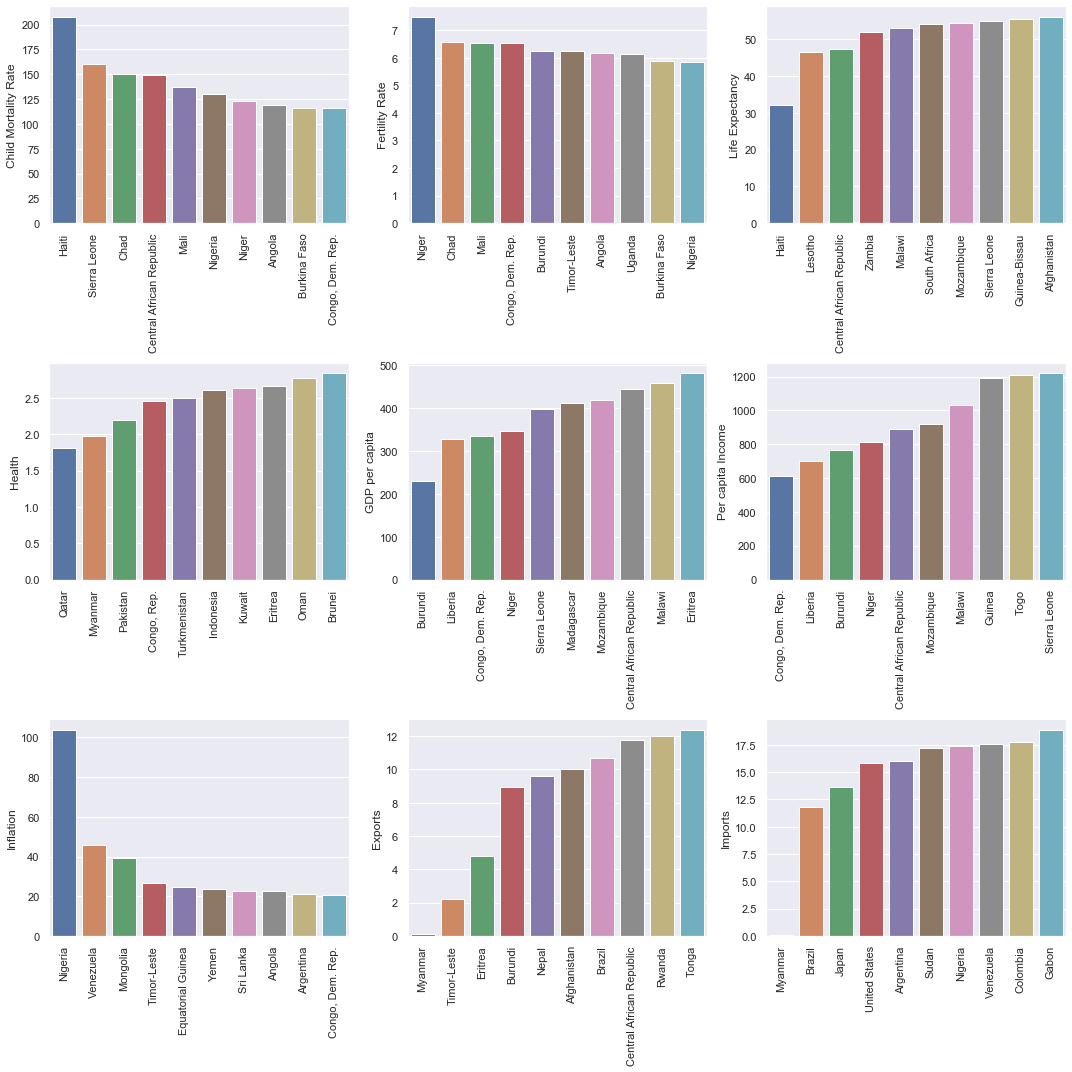

In [10]:
# We will have a look on the lowest 10 countries for each factor.
fig, axs = plt.subplots(3,3,figsize = (15,15))

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

top10_child_mort = help[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= top10_child_mort, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
top10_total_fer = help[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='total_fer', data= top10_total_fer, ax = axs[0,1])
plt1.set(xlabel = '', ylabel= 'Fertility Rate')

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same

bottom10_life_expec = help[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='life_expec', data= bottom10_life_expec, ax = axs[0,2])
plt1.set(xlabel = '', ylabel= 'Life Expectancy')

# Health :Total health spending as %age of Total GDP.

bottom10_health = help[['country','health']].sort_values('health', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='health', data= bottom10_health, ax = axs[1,0])
plt1.set(xlabel = '', ylabel= 'Health')

# The GDP per capita : Calculated as the Total GDP divided by the total population.

bottom10_gdpp = help[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='gdpp', data= bottom10_gdpp, ax = axs[1,1])
plt1.set(xlabel = '', ylabel= 'GDP per capita')

# Per capita Income : Net income per person

bottom10_income = help[['country','income']].sort_values('income', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='income', data= bottom10_income, ax = axs[1,2])
plt1.set(xlabel = '', ylabel= 'Per capita Income')


# Inflation: The measurement of the annual growth rate of the Total GDP

top10_inflation = help[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='inflation', data= top10_inflation, ax = axs[2,0])
plt1.set(xlabel = '', ylabel= 'Inflation')

# Exports: Exports of goods and services. Given as %age of the Total GDP

bottom10_exports = help[['country','exports']].sort_values('exports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='exports', data= bottom10_exports, ax = axs[2,1])
plt1.set(xlabel = '', ylabel= 'Exports')


# Imports: Imports of goods and services. Given as %age of the Total GDP

bottom10_imports = help[['country','imports']].sort_values('imports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='imports', data= bottom10_imports, ax = axs[2,2])
plt1.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.savefig('eda')
plt.show()

1. Niger is among the lowest 10 countries which has lowest factors for Child Mortality Rate, Fertility,GDP per capita,Per Capita Income and Exports.
2. Cental African Republic has lowest factors of Exports,Imports,Health,GDP per capita,Per Capita Income,Child Mortality Rate and Life Expectancy.
3. Congo, Demo. Rep. has low Inflation,Imports,GDP per capita,Per Capita Income,Health,Child Mortality Rate and Fertility.
4. Burundi has low Exports,Imports,GDP per capita,Per Capita Income,Health and Fertility Rates.
5. Myanmar has low Exports,Imports and Health.<br>
These are the countries which seems to have need for aid from HELP International.

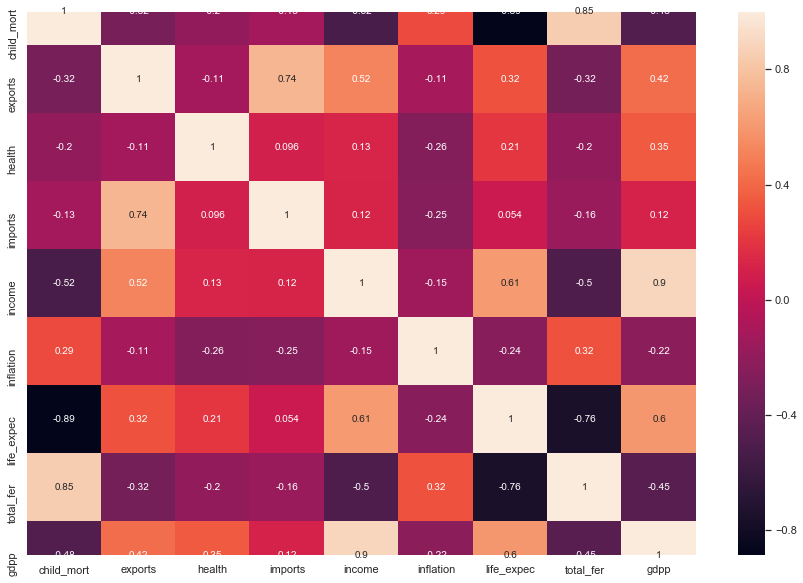

In [11]:
# Heatmap to understand the attributes dependency

plt.figure(figsize = (15,10))        
sns.heatmap(help.corr(),annot = True)

1. child_mortality and life_expentency are highly correlated with correlation of -0.89
2. child_mortality and total_fertility are highly correlated with correlation of 0.85
3. imports and exports are highly correlated with correlation of 0.74
4. life_expentency and total_fertility are highly correlated with correlation of -0.76

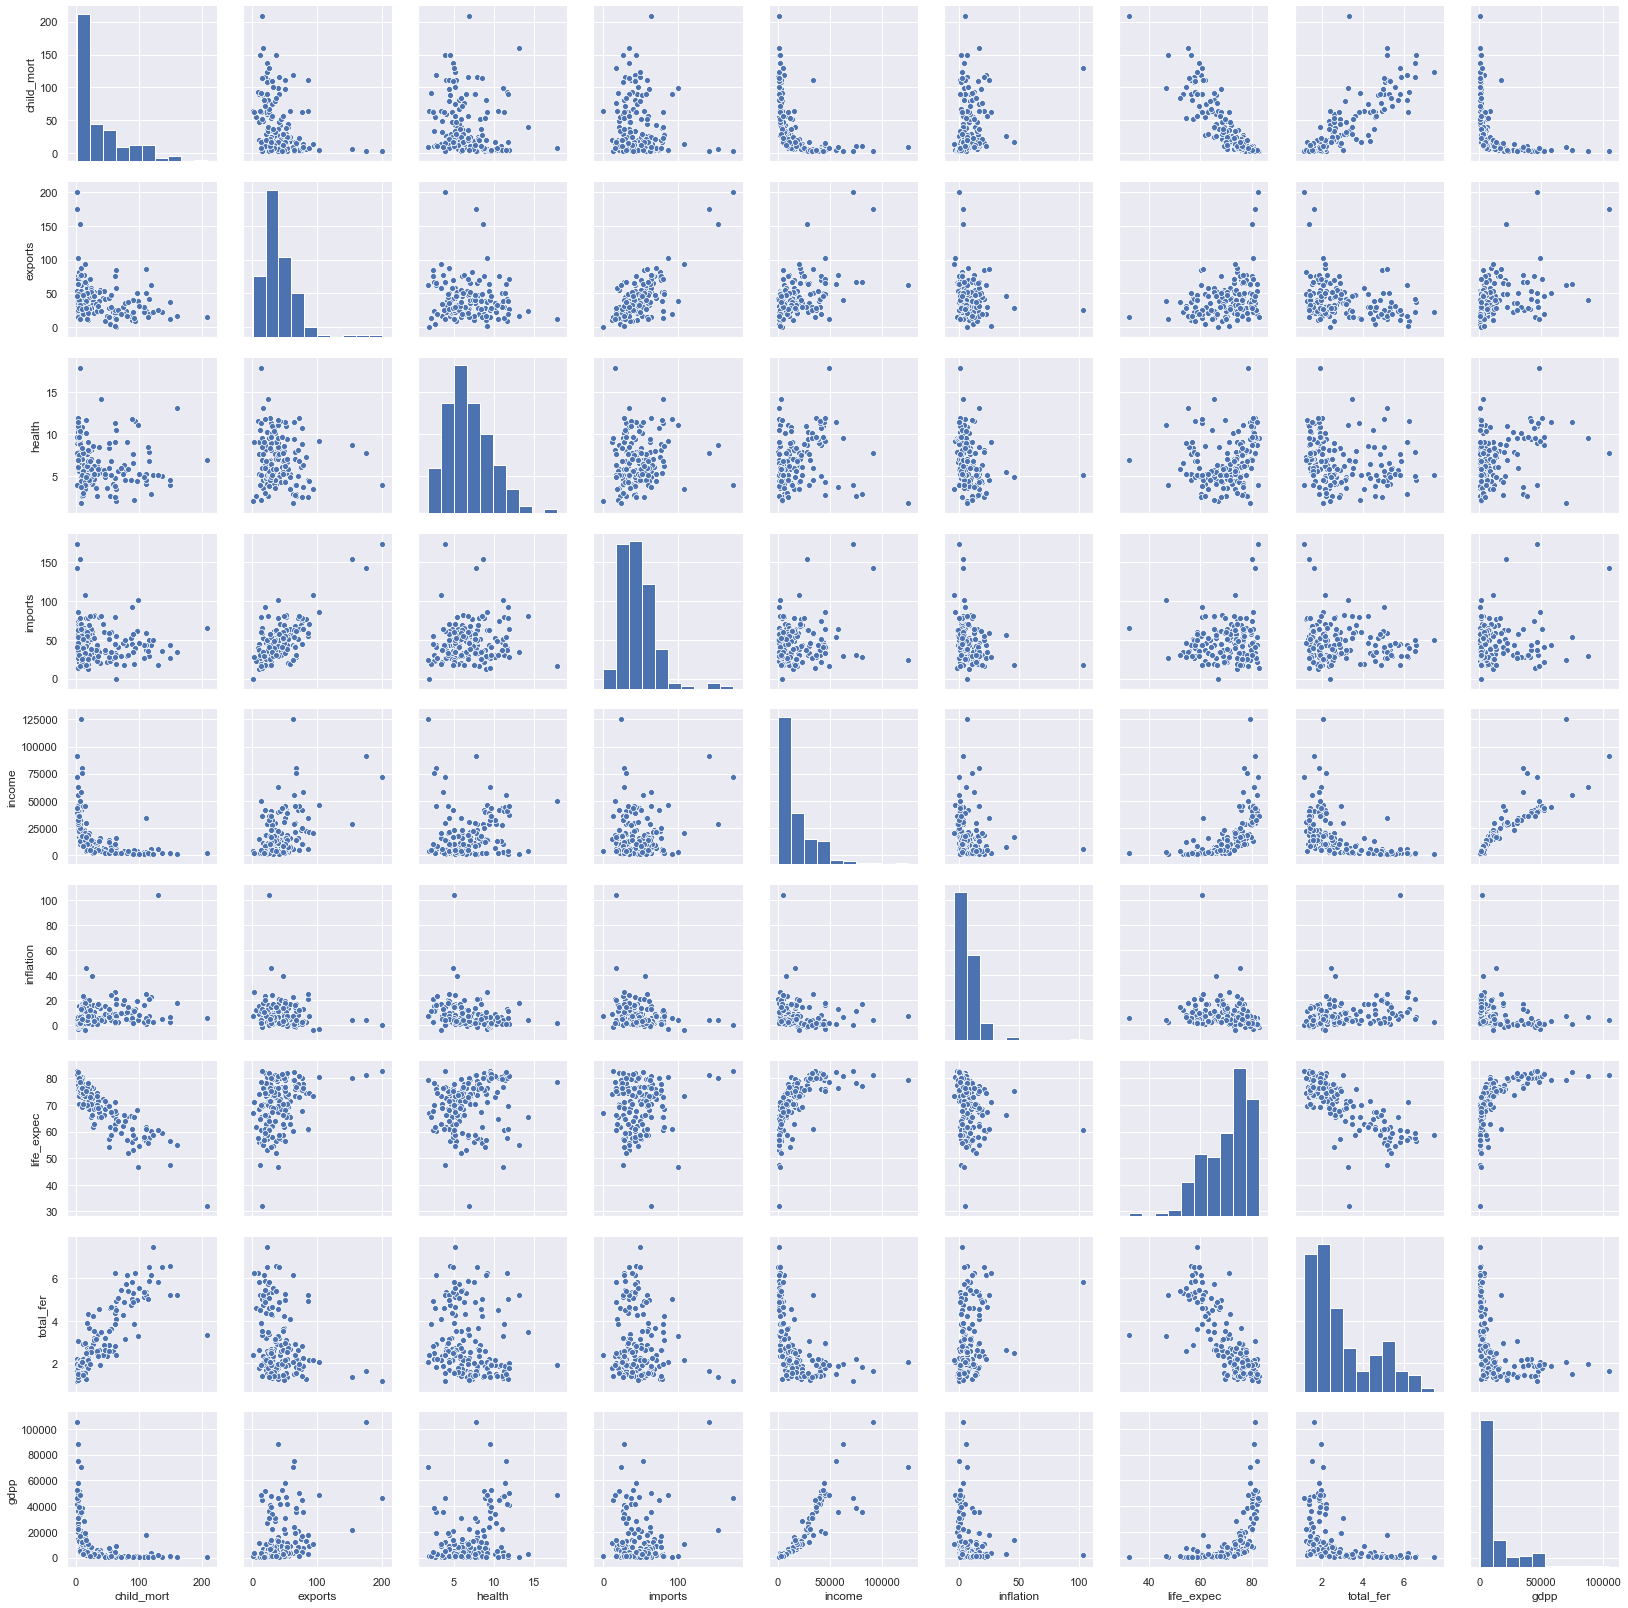

In [12]:
# Pairplot of all numeric columns
sns.pairplot(help)

## Step 4: Data Preparation

Derived Metrices

Deducing imports,exports and health spending from percentage values to actual values of their GDP per capita .Because the percentage values don't give a clear picture of that country. For example Austria and Belarus have almost same exports % but their gdpp has a huge gap which doesn't give an accurate idea of which country is more developed than the other.

In [13]:
# Converting exports,imports and health spending percentages to absolute values.
help['exports'] = help['exports'] * help['gdpp']/100
help['imports'] = help['imports'] * help['gdpp']/100
help['health'] = help['health'] * help['gdpp']/100

In [14]:
help.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200


In [15]:
#preserve the country column to some variable which will be used after performing PCA
y = help["country"]
y.head()

0    Afghanistan        
1    Albania            
2    Algeria            
3    Angola             
4    Antigua and Barbuda
Name: country, dtype: object

In [16]:
help1 = help.drop('country' , axis = 1)

In [17]:
#The country column is sucessfully removed from the dataframe
help1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553
1,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090
2,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460
3,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530
4,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200


### Rescaling the Features¶
Most software packages use SVD to compute the principal components and assume that the data is scaled and centred, so it is important to do standardisation/normalisation. There are two common ways of rescaling:

1. Min-Max scaling
2. Standardisation (mean-0, sigma-1)
Here, we will use Standardisation Scaling.

In [18]:
scaler      = StandardScaler()
help_scaled = scaler.fit_transform(help1)

In [19]:
help_scaled

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [20]:
help_scaled.max()

9.839814177922182

In [21]:
100*(help1.var()/sum(help1.var()))

child_mort   0.0001 
exports      25.8386
health       0.2595 
imports      17.3085
income       29.7244
inflation    0.0000 
life_expec   0.0000 
total_fer    0.0000 
gdpp         26.8688
dtype: float64

1. From the above it is clear none of the columns are contributing in explaining the variance.
2. even if we consider entire columns 100% variance in the dataset can't be explained.
3. Hence there is a need to transform the data into different space for which PCA will be performed.

## Step 5: Performing PCA on the dataset

In [22]:
pca = PCA(svd_solver = 'randomized' , random_state = 100)

In [23]:
# Lets apply PCA on the scaled data
pca.fit(help_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='randomized', tol=0.0, whiten=False)

In [24]:
# PCA components created
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [25]:
# Variance Ratio
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

Text(0, 0.5, 'Variance Ratio')

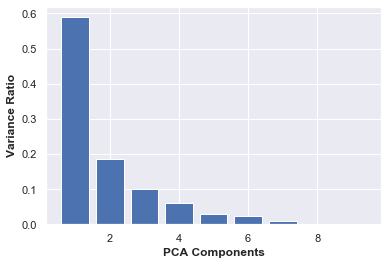

In [26]:
# Variance Ratio bar plot for each PCA components.
ax = plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("PCA Components",fontweight = 'bold')
plt.ylabel("Variance Ratio",fontweight = 'bold')

1. With first component variance explained is almost 60%.
2. For second component variance explained is almost 20%.
3. With third component variance explained is almost 10%.<br>
So with three PC's we explain about 90% of variance in data.

Text(0, 0.5, 'Cummulative Variance')

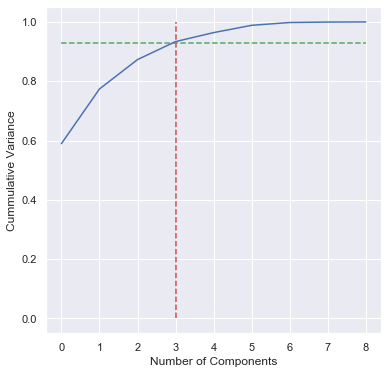

In [27]:
#Plotting scree plot
%matplotlib inline
fig = plt.figure(figsize = (6,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=3, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.93, xmax=8, xmin=0, colors="g", linestyles="--")
plt.xlabel("Number of Components")
plt.ylabel("Cummulative Variance")

It is evident from the above Scree plot that more than 90% variance is explained by the first 3 Principal Components. Hence, we will use these  3 Principal Components only going forward for Clustering process.

In [28]:
# Checking which attributes are well explained by the pca components
org_col = list(help.drop(['country'],axis=1).columns)
attributes_pca = pd.DataFrame({'Attribute':org_col,'PC_1':pca.components_[0],'PC_2':pca.components_[1],'PC_3':pca.components_[2]})

In [29]:
attributes_pca

,Attribute,PC_1,PC_2,PC_3
0,child_mort,-0.3164,0.4763,-0.1500
1,exports,0.3429,0.3973,-0.0306
2,health,0.3585,0.1551,-0.0757
3,imports,0.3449,0.3708,-0.0722
4,income,0.3800,0.1284,0.1458
5,inflation,-0.1431,0.2213,0.9484
6,life_expec,0.3439,-0.3698,0.1968
7,total_fer,-0.3028,0.4597,-0.0778
8,gdpp,0.4000,0.2006,0.0103


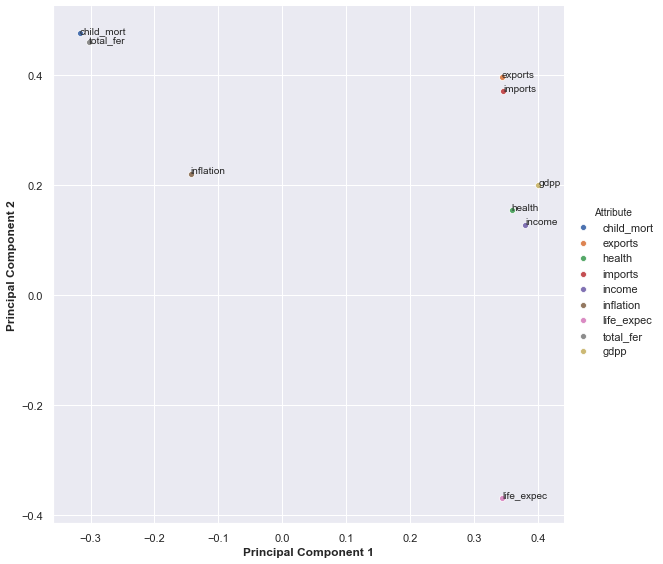

In [30]:
# Plotting the above dataframe for better visualization with PC1 and PC2

sns.pairplot(data=attributes_pca, x_vars=["PC_1"], y_vars=["PC_2"], hue = "Attribute" ,height=8)
plt.xlabel("Principal Component 1",fontweight = 'bold')
plt.ylabel("Principal Component 2",fontweight = 'bold')

for i,txt in enumerate(attributes_pca.Attribute):
    plt.annotate(txt, (attributes_pca.PC_1[i],attributes_pca.PC_2[i]))

1. life expectency, income, gdpp and health are very well explained by PC1.
2. imports and exports are well explained by both the components PC1 and PC2.
3. child mortality and total fertility are well explained by PC2.
4. inflation is neither explained by PC1 nor with PC2

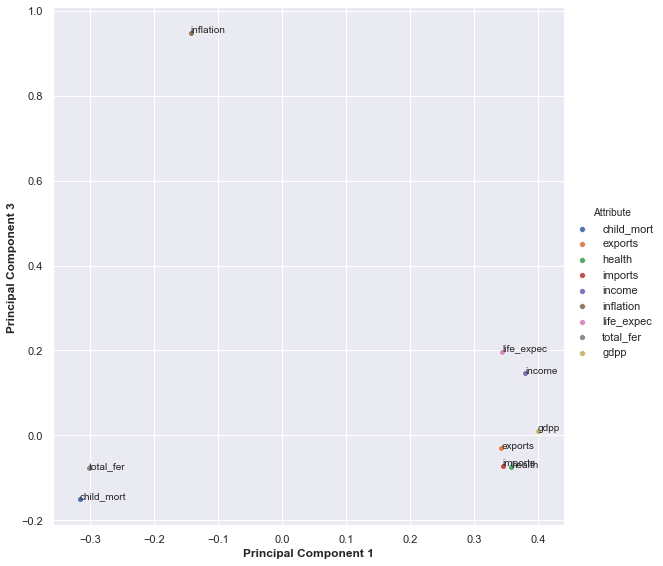

In [31]:
# Plotting the above dataframe with PC1 and PC3 to understand the components which explains inflation.
sns.pairplot(data=attributes_pca, x_vars=["PC_1"], y_vars=["PC_3"], hue = "Attribute" ,height=8)
plt.xlabel("Principal Component 1",fontweight = 'bold')
plt.ylabel("Principal Component 3",fontweight = 'bold')

for i,txt in enumerate(attributes_pca.Attribute):
    plt.annotate(txt, (attributes_pca.PC_1[i],attributes_pca.PC_3[i]))

1. inflation is well explained by PC3.

Since 90% variance is explained by 3 principal components, lets build the dataframe using those 3 components only.

PCA with 3 Principal Components

In [32]:
# Building the dataframe using Incremental PCA for better efficiency.
pca_final = IncrementalPCA(n_components = 3)

In [33]:
# Fitting the scaled df on incremental pca
help_pca = pca_final.fit_transform(help_scaled)
help_pca.shape

(167, 3)

In [34]:
help_pca[:10]

array([[-2.63744157,  1.46903797, -0.54135911],
       [-0.02227696, -1.43189586, -0.02070095],
       [-0.45762626, -0.67330094,  0.96186728],
       [-2.7245203 ,  2.17458267,  0.60668655],
       [ 0.64984852, -1.02437392, -0.25010285],
       [ 0.03719686, -0.68088909,  1.46696276],
       [-0.33269152, -1.27451685,  0.17663611],
       [ 3.18036154, -0.25078488, -0.11687726],
       [ 3.81568156,  0.2560835 , -0.27049529],
       [-0.46751515, -0.49349236,  0.60328803]])

In [35]:
# creating transpose so that each column is properly arranged
pc = np.transpose(help_pca)

In [36]:
# Creating new dataframe with Principal components
pca_df = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2]})

In [37]:
pca_df.head()

,PC1,PC2,PC3
0,-2.6374,1.4690,-0.5414
1,-0.0223,-1.4319,-0.0207
2,-0.4576,-0.6733,0.9619
3,-2.7245,2.1746,0.6067
4,0.6498,-1.0244,-0.2501


(3.0, 0.0)

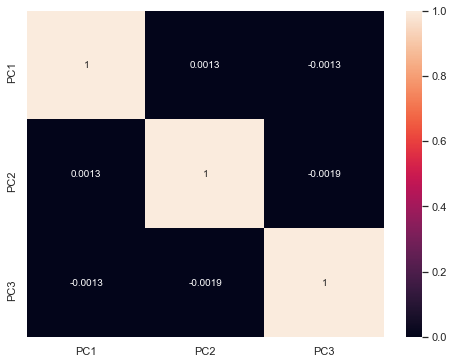

In [38]:
# Plotting Heatmap to check is there still dependency in the dataset.

plt.figure(figsize = (8,6))        
ax = sns.heatmap(pca_df.corr(),annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

As we can see from above heatmap that the correlation among the attributes is almost 0, we can proceed with this dataframe.

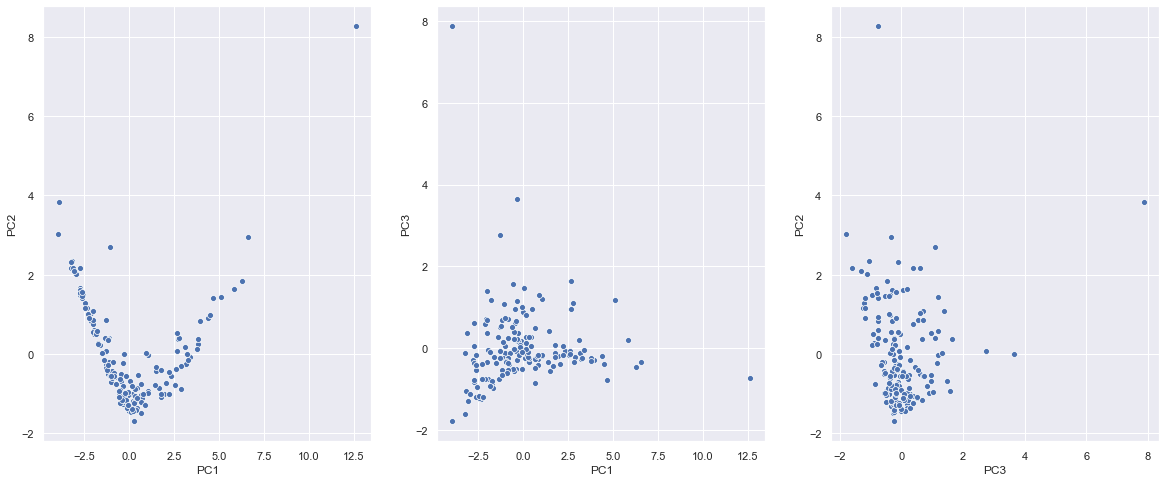

In [39]:
# Scatter Plot to visualize the spread of data across PCA components
plt.figure(figsize=(20, 8))
plt.subplot(1,3,1)
sns.scatterplot(data=pca_df, x='PC1', y='PC2')
plt.subplot(1,3,2)
sns.scatterplot(data=pca_df, x='PC1', y='PC3')
plt.subplot(1,3,3)
sns.scatterplot(data=pca_df, x='PC3', y='PC2')

1. Inter Cluster distance is more between PC1 and PC2.
2. Inter cluster distance is less bwteen PC1,PC3 and PC3,PC2.

In [40]:
# Add back the country to the obtained Principal Component
pca_df = pd.concat([pca_df,y],axis =1)
pca_df.head()

,PC1,PC2,PC3,country
0,-2.6374,1.4690,-0.5414,Afghanistan
1,-0.0223,-1.4319,-0.0207,Albania
2,-0.4576,-0.6733,0.9619,Algeria
3,-2.7245,2.1746,0.6067,Angola
4,0.6498,-1.0244,-0.2501,Antigua and Barbuda


### Outlier Analysis and Treatment

Text(0.5, 0, 'PC Components')

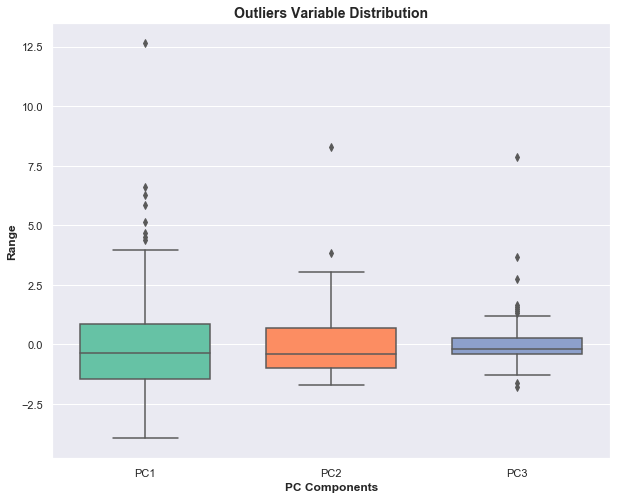

In [41]:
# Outlier Analysis 
outliers = ['PC1','PC2','PC3']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = pca_df[outliers], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("PC Components", fontweight = 'bold')

In [42]:
# Outlier Treatment for PC1
Q1 = pca_df.PC1.quantile(0.05)
Q3 = pca_df.PC1.quantile(0.95)
pca_df = pca_df[(pca_df.PC1>=Q1) & (pca_df.PC1<=Q3)]

# Outlier Treatment for PC2
Q1 = pca_df.PC2.quantile(0.05)
Q3 = pca_df.PC2.quantile(0.95)
pca_df = pca_df[(pca_df.PC2>=Q1) & (pca_df.PC2<=Q3)]

# Outlier Treatment for PC3
Q1 = pca_df.PC3.quantile(0.05)
Q3 = pca_df.PC3.quantile(0.95)
pca_df = pca_df[(pca_df.PC3>=Q1) & (pca_df.PC3<=Q3)]

Text(0.5, 0, 'PC Components')

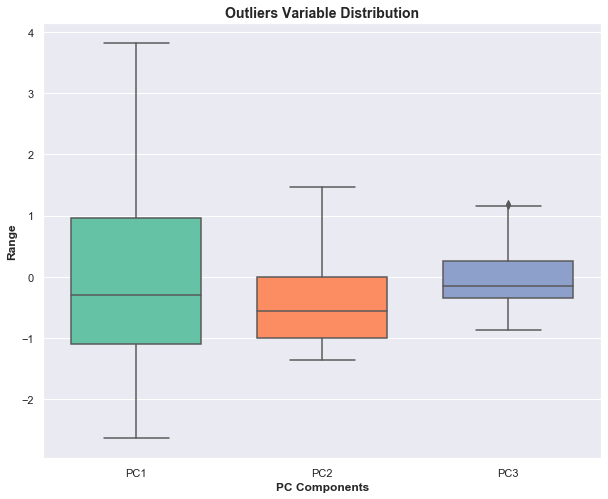

In [43]:
#After otlier treatment
outliers = ['PC1','PC2','PC3']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = pca_df[outliers], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("PC Components", fontweight = 'bold')

In [44]:
# Let's see for the amount of data lost
print(pca_df.shape)
print(100*((167-119)/167))

(119, 4)
28.74251497005988


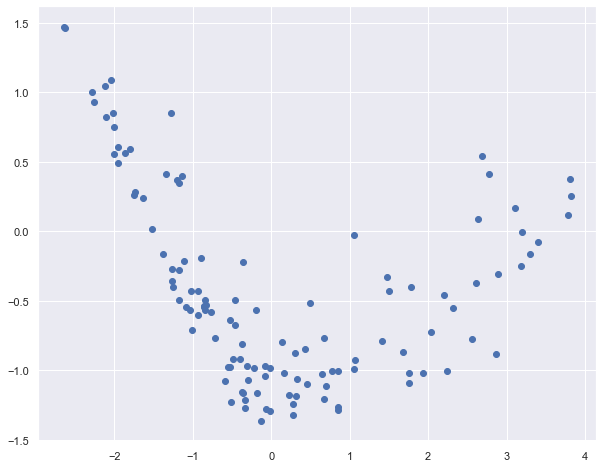

In [45]:
# Scatter plot to check the scope for clustering
plt.scatter(x = 'PC1' , y = 'PC2' , data = pca_df)

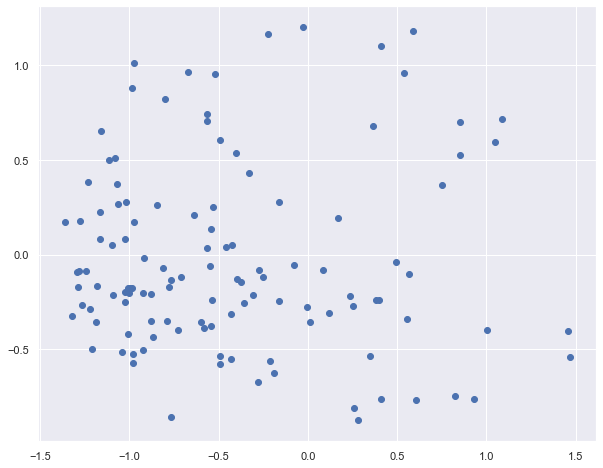

In [46]:
# Scatter plot to check the scope for clustering
plt.scatter(x = 'PC2' , y = 'PC3' , data = pca_df)

In [47]:
# Reindexing the df after outlier removal
pca_help = pca_df.reset_index(drop=True)
df_1 = pca_help.drop(['country'],axis=1)

## Step 6: Hopkins Statistics Test

The Hopkins statistic (introduced by Brian Hopkins and John Gordon Skellam) is a way of measuring the cluster tendency of a data set.It acts as a statistical hypothesis test where the null hypothesis is that the data is generated by a Poisson point process and are thus uniformly randomly distributed. A value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0.

In [48]:
# Calculating Hopkins score to know whether the data is good for clustering or not.
def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors = 1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd, wjd)
        HS = 0
 
    return HS

In [49]:
# Hopkins Score
hopkins(df_1)

0.7864599227785771

1. The data is just good as the hopkins score is around 75-80%.
2. The value is not too close to 1.

## Step 7: Model Building

K- means Clustering is one of the simplest and popular unsupervised machine learning algorithms.

#### Finding the optimal number of clusters

In [50]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4873400103541441
For n_clusters=3, the silhouette score is 0.4639771456218248
For n_clusters=4, the silhouette score is 0.3987356568367148
For n_clusters=5, the silhouette score is 0.36170980333920066
For n_clusters=6, the silhouette score is 0.3610569497863052
For n_clusters=7, the silhouette score is 0.36883099217142346
For n_clusters=8, the silhouette score is 0.3692182106166263


In [51]:
ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k).fit(df_1)
    ss.append([k,silhouette_score(df_1, kmeans.labels_)])

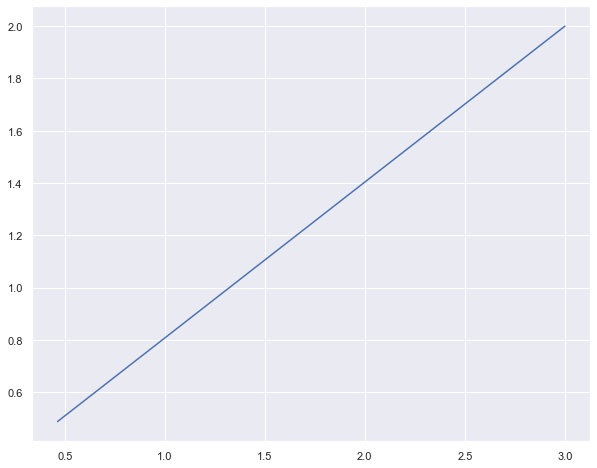

In [52]:
plt.plot(pd.DataFrame(ss[0],pd.DataFrame(ss[1])))

1. The peak is at 3.
2. The required number of cluster is 3.

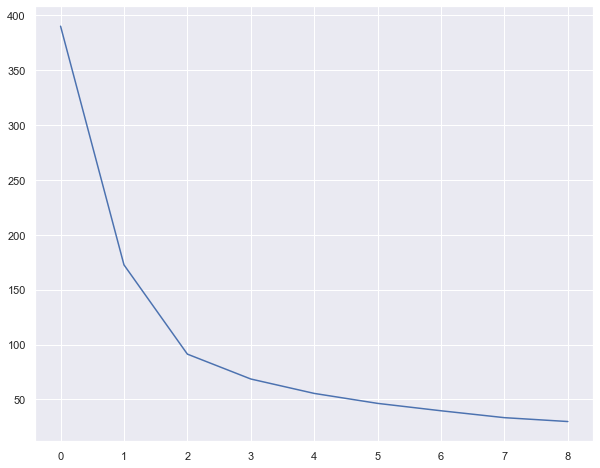

In [53]:
# Elbow Curve
ssd = []
for k in list(range(1,10)):
    model = KMeans(n_clusters = k , max_iter = 50).fit(df_1)
    ssd.append(model.inertia_)
    
plt.plot(ssd)

1. First elbow curve is at 1, cluster 1 doesn't make any sense.
2. Second is at 4 so I'm cosidering k=4
3. Looking at the above elbow curve it looks good to proceed with either 4 or 5 clusters.

In [54]:
# KMeans Cluster with K choosen
model_clus2 = KMeans(n_clusters = 4 , max_iter = 50 ,random_state = 50)
model_clus2.fit(df_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [55]:
# add cluster id s to the PC data
help_km = pd.concat([pca_help.reset_index().drop('index',axis = 1),pd.Series(model_clus2.labels_)],axis = 1)
help_km.columns = ['PC1','PC2','PC3','country','KMeanClustID']

In [56]:
help_km.head()

,PC1,PC2,PC3,country,KMeanClustID
0,-2.6374,1.4690,-0.5414,Afghanistan,3
1,-0.4576,-0.6733,0.9619,Algeria,0
2,0.6498,-1.0244,-0.2501,Antigua and Barbuda,1
3,-0.3327,-1.2745,0.1766,Armenia,0
4,3.1804,-0.2508,-0.1169,Australia,2


In [57]:
help_km['KMeanClustID'].value_counts()

0    48
1    29
3    23
2    19
Name: KMeanClustID, dtype: int64

It seems there are good number of countries in each clusters.

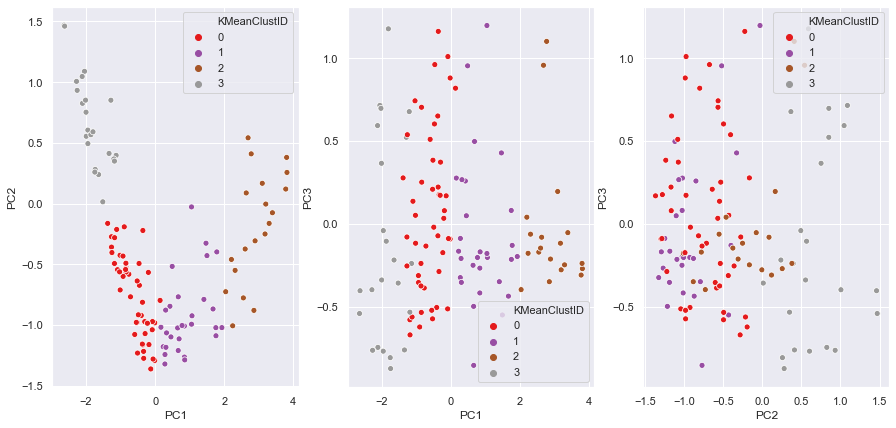

In [58]:
# Scatter plot on Principal components to visualize the spread of the data
fig, axes = plt.subplots(1,3, figsize=(15,7))

sns.scatterplot(x='PC1',y='PC2',hue='KMeanClustID',legend='full',palette="Set1",data=help_km,ax=axes[0])
sns.scatterplot(x='PC1',y='PC3',hue='KMeanClustID',legend='full',palette="Set1",data=help_km,ax=axes[1])
sns.scatterplot(x='PC2',y='PC3',hue='KMeanClustID',legend='full',palette="Set1",data=help_km,ax=axes[2])

1. In plot 1 there is lots of inter-cluster distance which is not a good sign.
2. In plot 3 the inter-cluster distance is too low which is also not a good sign.

#### KMeans with k=5

In [59]:
help_clus5 = KMeans(n_clusters = 5, max_iter = 50 , random_state = 50)
help_clus5.fit(df_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [60]:
# add cluster id s to the PC data
help_km1 = pd.concat([pca_help.reset_index().drop('index',axis = 1),pd.Series(help_clus5.labels_)],axis = 1)
help_km1.columns = ['PC1','PC2','PC3','country','KMeanClustID']

In [61]:
help_km1.head()

,PC1,PC2,PC3,country,KMeanClustID
0,-2.6374,1.4690,-0.5414,Afghanistan,2
1,-0.4576,-0.6733,0.9619,Algeria,0
2,0.6498,-1.0244,-0.2501,Antigua and Barbuda,3
3,-0.3327,-1.2745,0.1766,Armenia,0
4,3.1804,-0.2508,-0.1169,Australia,1


In [62]:
#Number of Countries in each Cluster
help_km1['KMeanClustID'].value_counts()

0    35
4    24
2    23
3    20
1    17
Name: KMeanClustID, dtype: int64

It seems there are good number of countries in each clusters.

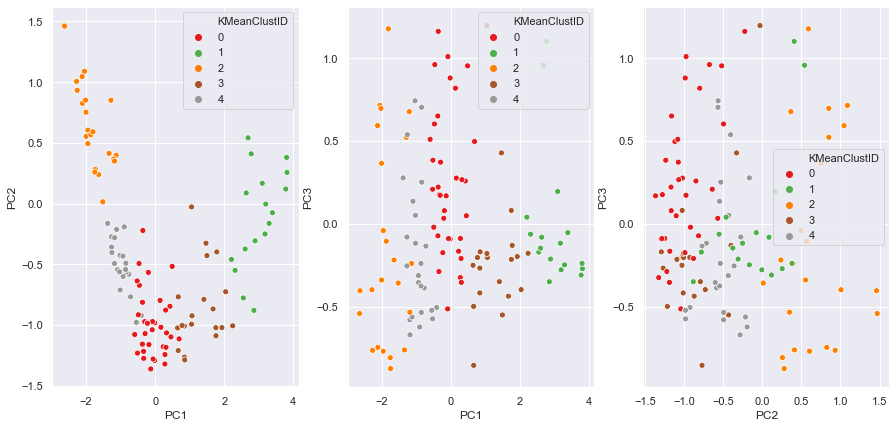

In [63]:
# Scatter plot on Principal components to visualize the spread of the data
fig, axes = plt.subplots(1,3, figsize=(15,7))

sns.scatterplot(x='PC1',y='PC2',hue='KMeanClustID',legend='full',palette="Set1",data=help_km1,ax=axes[0])
sns.scatterplot(x='PC1',y='PC3',hue='KMeanClustID',legend='full',palette="Set1",data=help_km1,ax=axes[1])
sns.scatterplot(x='PC2',y='PC3',hue='KMeanClustID',legend='full',palette="Set1",data=help_km1,ax=axes[2])

1. Clusters formed are same as 4.
2. All the drawbacks of k=4 is present here too.
4. So I’m proceeding with K=4 i.e 4 clusters.
5. In real time we can get this information of picking up clsters from Clients / Client Manager of how he is focusing to segregate the data ,so lets proceed with clustering using 5 clusters.

### Cluster Profiling

In [64]:
help_km.head()

,PC1,PC2,PC3,country,KMeanClustID
0,-2.6374,1.4690,-0.5414,Afghanistan,3
1,-0.4576,-0.6733,0.9619,Algeria,0
2,0.6498,-1.0244,-0.2501,Antigua and Barbuda,1
3,-0.3327,-1.2745,0.1766,Armenia,0
4,3.1804,-0.2508,-0.1169,Australia,2


In [65]:
help_km.KMeanClustID.value_counts()

0    48
1    29
3    23
2    19
Name: KMeanClustID, dtype: int64

In [66]:
help_clus_prof = pd.merge(help , help_km , how = 'inner' , on = 'country')
help_clus_prof.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,KMeanClustID
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553,-2.6374,1.4690,-0.5414,3
1,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460,-0.4576,-0.6733,0.9619,0
2,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200,0.6498,-1.0244,-0.2501,1
3,Armenia,18.1000,669.7600,141.6800,1458.6600,6700,7.7700,73.3000,1.6900,3220,-0.3327,-1.2745,0.1766,0
4,Australia,4.8000,10276.2000,4530.8700,10847.1000,41400,1.1600,82.0000,1.9300,51900,3.1804,-0.2508,-0.1169,2


In [67]:
# drop PC s from the data
help_clus_prof.drop(['PC1','PC2','PC3'],axis =1 , inplace = True)
help_clus_prof.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeanClustID
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553,3
1,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460,0
2,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200,1
3,Armenia,18.1000,669.7600,141.6800,1458.6600,6700,7.7700,73.3000,1.6900,3220,0
4,Australia,4.8000,10276.2000,4530.8700,10847.1000,41400,1.1600,82.0000,1.9300,51900,2


### Analysis of the Clusters

In [68]:
help_clus_prof.groupby('KMeanClustID').income.mean()

KMeanClustID
0   8136.8750 
1   22565.5172
2   40536.8421
3   4650.8696 
Name: income, dtype: float64

In [69]:
help_clus_prof.shape

(119, 11)

In [70]:
# mean of columns
income_clus_mean = pd.DataFrame(help_clus_prof.groupby('KMeanClustID').income.mean())
child_mort_clus_mean = pd.DataFrame(help_clus_prof.groupby('KMeanClustID').child_mort.mean())
exports_clus_mean = pd.DataFrame(help_clus_prof.groupby('KMeanClustID').exports.mean())
health_clus_mean = pd.DataFrame(help_clus_prof.groupby('KMeanClustID').health.mean())
imports_clus_mean = pd.DataFrame(help_clus_prof.groupby('KMeanClustID').imports.mean())
inflation_clus_mean = pd.DataFrame(help_clus_prof.groupby('KMeanClustID').inflation.mean())
life_expec_clus_mean = pd.DataFrame(help_clus_prof.groupby('KMeanClustID').life_expec.mean())
total_fer_clus_mean = pd.DataFrame(help_clus_prof.groupby('KMeanClustID').total_fer.mean())
gdpp_clus_mean = pd.DataFrame(help_clus_prof.groupby('KMeanClustID').gdpp.mean())

In [71]:
# concat the resultant with country colum
help_ana = pd.concat([income_clus_mean,child_mort_clus_mean,exports_clus_mean,health_clus_mean,imports_clus_mean,inflation_clus_mean,life_expec_clus_mean,total_fer_clus_mean,gdpp_clus_mean] , axis = 1)
help_ana.head()

,income,child_mort,exports,health,imports,inflation,life_expec,total_fer,gdpp
KMeanClustID,,,,,,,,,
0,8136.8750,29.0063,1348.8383,212.9333,1569.6786,7.8436,71.0708,2.5540,3708.7917
1,22565.5172,9.9552,7351.2617,1063.4950,7237.1138,3.2972,76.2793,1.8590,14783.4483
2,40536.8421,4.9684,16178.3474,3808.2753,14919.4789,2.4829,80.5000,1.7442,39452.6316
3,4650.8696,68.4783,884.7745,135.8739,838.6342,10.7113,62.1696,4.5074,2152.7391


From the business understanding we have learnt that Child_Mortality, Income, Gdpp are some important factors which decides the development of any country. We have also cross checked with Principal components and found that these variables have good score in PCA. Hence, we will proceed with analyzing these 3 components to build some meaningful clusters

In [72]:
help_ana.reset_index(inplace=True)
help_ana.head()

,KMeanClustID,income,child_mort,exports,health,imports,inflation,life_expec,total_fer,gdpp
0,0,8136.8750,29.0063,1348.8383,212.9333,1569.6786,7.8436,71.0708,2.5540,3708.7917
1,1,22565.5172,9.9552,7351.2617,1063.4950,7237.1138,3.2972,76.2793,1.8590,14783.4483
2,2,40536.8421,4.9684,16178.3474,3808.2753,14919.4789,2.4829,80.5000,1.7442,39452.6316
3,3,4650.8696,68.4783,884.7745,135.8739,838.6342,10.7113,62.1696,4.5074,2152.7391


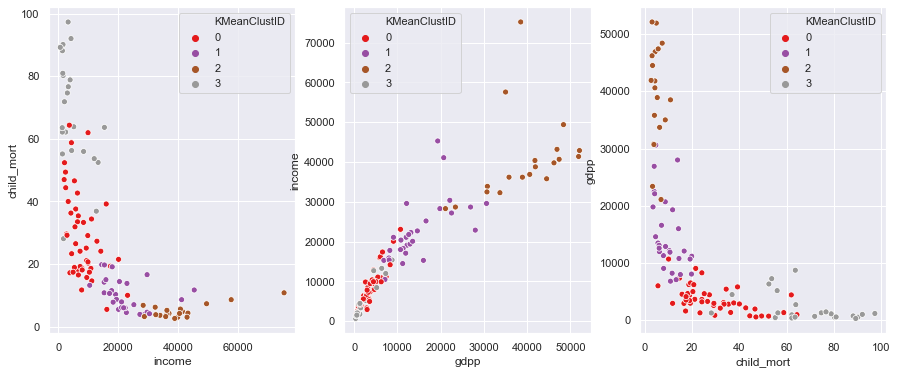

In [73]:
# Scatter plot on Original attributes to visualize the spread of the data

fig, axes = plt.subplots(1,3, figsize=(15,6))

sns.scatterplot(x = 'income', y = 'child_mort',hue='KMeanClustID',data = help_clus_prof,legend='full',palette="Set1",ax=axes[0])
sns.scatterplot(x = 'gdpp', y = 'income',hue='KMeanClustID', data = help_clus_prof,legend='full',palette="Set1",ax=axes[1])
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='KMeanClustID', data=help_clus_prof,legend='full',palette="Set1",ax=axes[2])

1. Cluster 1 has highest income,GDP per capita.
2. Clustr 2 has highest child mortality , low income and low gdpp.
3. Cluster 3,4 has low income and low gdpp.
4. Cluster 0 has low income and low gdpp and low child mortality.

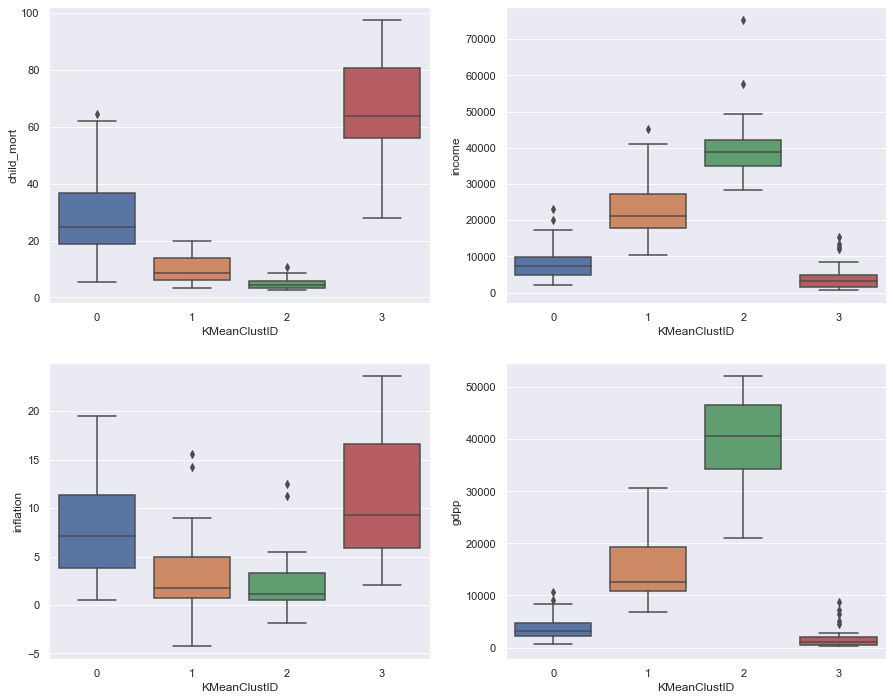

In [74]:
# Box plot on Kmeans attributes to visualize the spread of the data

fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.boxplot(x = 'KMeanClustID', y = 'child_mort', data = help_clus_prof,ax=axes[0][0])
sns.boxplot(x = 'KMeanClustID', y = 'income', data = help_clus_prof,ax=axes[0][1])
sns.boxplot(x = 'KMeanClustID', y = 'inflation', data=help_clus_prof,ax=axes[1][0])
sns.boxplot(x = 'KMeanClustID', y = 'gdpp', data=help_clus_prof,ax=axes[1][1])

1. Child Mortality is highest for Cluster 2 and Cluster 4.These clusters need some aid.
2. Income and Gdpp are measures of development. Higher the per capita income and gdpp better is the country's development.
3. Income per capita and gdpp seems lowest for countries in clusters 2 and 4. Hence, these countries need some help.

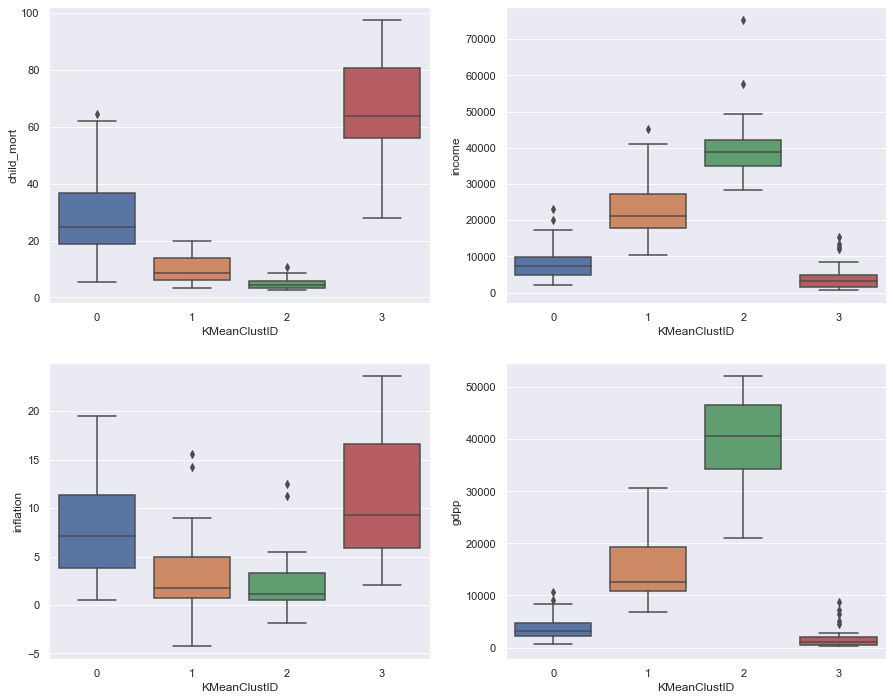

In [75]:
# Box plot to visualise the mean value of few original attributes.

fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.boxplot(x = 'KMeanClustID', y = 'child_mort', data = help_clus_prof,ax=axes[0][0])
sns.boxplot(x = 'KMeanClustID', y = 'income', data = help_clus_prof,ax=axes[0][1])
sns.boxplot(x = 'KMeanClustID', y = 'inflation', data=help_clus_prof,ax=axes[1][0])
sns.boxplot(x = 'KMeanClustID', y = 'gdpp', data=help_clus_prof,ax=axes[1][1])

1. Child Mortality is highest for Cluster 0 and Cluster 3.These clusters need some aid.
2. Income and Gdpp are measures of development. Higher the per capita income and gdpp better is the country's development.
3. Income per capita and gdpp seems lowest for countries in clusters 0 and 3. Hence, these countries need some help.
Indicating both results are same. i.e clustering is matching with original data.

### Hierarchical Clustering

Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering,
1. Divisive
2. Agglomerative.

In [76]:
pca_help.head()

,PC1,PC2,PC3,country
0,-2.6374,1.4690,-0.5414,Afghanistan
1,-0.4576,-0.6733,0.9619,Algeria
2,0.6498,-1.0244,-0.2501,Antigua and Barbuda
3,-0.3327,-1.2745,0.1766,Armenia
4,3.1804,-0.2508,-0.1169,Australia


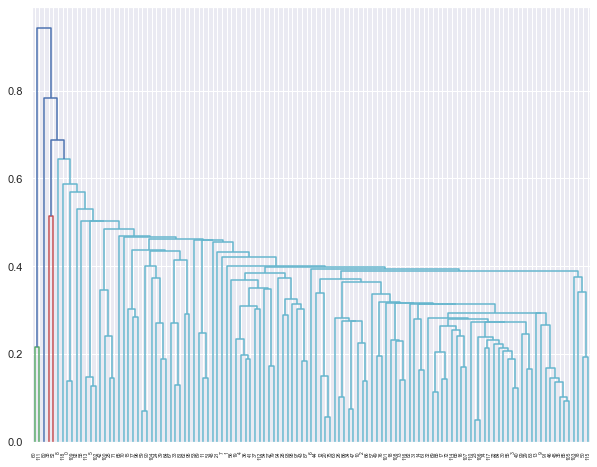

In [77]:
# Single linkage
mergings = linkage(pca_help.drop('country',axis =1), method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

1. dendogram is not so clear.
2. So we shall perform complete linkage to indentify the optimal number of clusters.

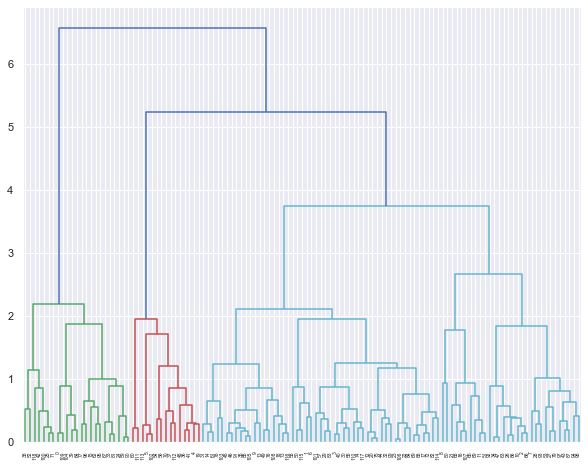

In [78]:
# Complete linkage
mergings = linkage(pca_help.drop('country',axis =1), method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

1. dendogram is clear.
2. Either the 4 or 5 clusters can be formed. 

In [79]:
pca_help_hc = pca_help.copy()
pca_help_hc.head()

,PC1,PC2,PC3,country
0,-2.6374,1.4690,-0.5414,Afghanistan
1,-0.4576,-0.6733,0.9619,Algeria
2,0.6498,-1.0244,-0.2501,Antigua and Barbuda
3,-0.3327,-1.2745,0.1766,Armenia
4,3.1804,-0.2508,-0.1169,Australia


In [80]:
# Let cut the tree at height of approx 3 to get 4 clusters and see if it get any better cluster formation.

clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
help_hc = pd.concat([pca_help_hc, clusterCut], axis=1)
help_hc.columns = ['PC1', 'PC2','PC3','country','HierarchicalClustID']

In [81]:
# 4 clusters using complete linkage
cl_cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cl_cluster_labels

array([0, 1, 2, 1, 3, 3, 1, 2, 2, 1, 2, 2, 1, 1, 1, 0, 2, 1, 1, 3, 1, 2,
       1, 1, 0, 0, 2, 2, 2, 1, 1, 1, 1, 0, 2, 1, 3, 3, 0, 0, 1, 3, 0, 2,
       1, 1, 1, 2, 3, 1, 1, 2, 0, 2, 3, 1, 3, 1, 1, 0, 3, 1, 0, 2, 0, 2,
       2, 0, 2, 1, 3, 0, 1, 1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 2, 2,
       1, 2, 0, 1, 2, 2, 2, 0, 0, 2, 2, 1, 0, 1, 3, 1, 0, 1, 1, 2, 1, 0,
       1, 3, 3, 3, 1, 1, 1, 1, 0])

In [82]:
help_hc.HierarchicalClustID.value_counts()

1    51
2    30
0    23
3    15
Name: HierarchicalClustID, dtype: int64

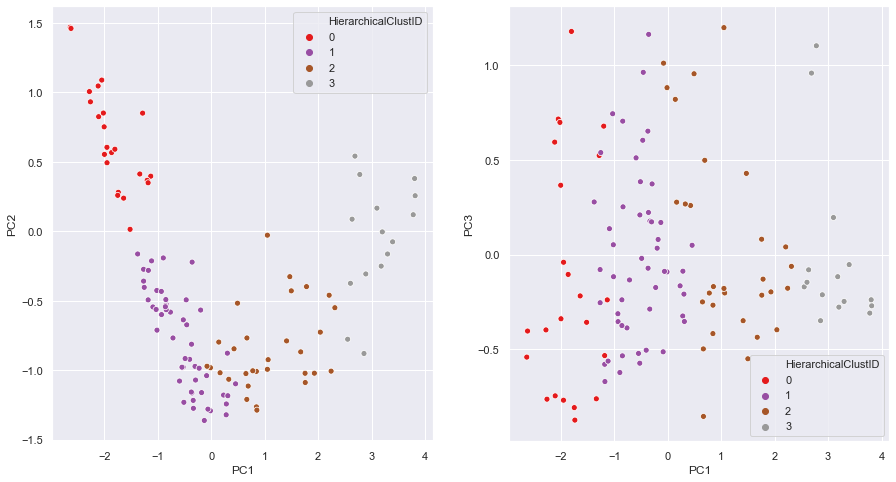

In [83]:
# Scatter plot on Principal components to visualize the spread of the data
fig, axes = plt.subplots(1,2, figsize=(15,8))
sns.scatterplot(x='PC1',y='PC2',hue='HierarchicalClustID',legend='full',palette="Set1",data=help_hc,ax=axes[0])
sns.scatterplot(x='PC1',y='PC3',hue='HierarchicalClustID',legend='full',palette="Set1",data=help_hc,ax=axes[1])

1. Cluster 4 is not properly formed.
2. Seems like majority of countries belong to cluster 0.

In [84]:
help.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200


#### Analysis of Cluster

In [85]:
# Merging the df with PCA with original df
help_merge_hc = pd.merge(help,help_hc,on='country')
help_merge_col_hc = help_merge_hc[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','HierarchicalClustID']]

In [86]:
# mean of columns
income_hier_mean = pd.DataFrame(help_merge_col_hc.groupby('HierarchicalClustID').income.mean())
child_mort_hier_mean = pd.DataFrame(help_merge_col_hc.groupby('HierarchicalClustID').child_mort.mean())
exports_hier_mean = pd.DataFrame(help_merge_col_hc.groupby('HierarchicalClustID').exports.mean())
health_hier_mean = pd.DataFrame(help_merge_col_hc.groupby('HierarchicalClustID').health.mean())
imports_hier_mean = pd.DataFrame(help_merge_col_hc.groupby('HierarchicalClustID').imports.mean())
inflation_hier_mean = pd.DataFrame(help_merge_col_hc.groupby('HierarchicalClustID').inflation.mean())
life_expec_hier_mean = pd.DataFrame(help_merge_col_hc.groupby('HierarchicalClustID').life_expec.mean())
total_fer_hier_mean = pd.DataFrame(help_merge_col_hc.groupby('HierarchicalClustID').total_fer.mean())
gdpp_hier_mean = pd.DataFrame(help_merge_col_hc.groupby('HierarchicalClustID').gdpp.mean())

# concat the resultant with country colum
help_merge_col_hc_ana = pd.concat([income_hier_mean,child_mort_hier_mean,exports_hier_mean,health_hier_mean,imports_hier_mean,inflation_hier_mean,life_expec_hier_mean,total_fer_hier_mean,gdpp_hier_mean] , axis = 1)
help_merge_col_hc_ana.head()

,income,child_mort,exports,health,imports,inflation,life_expec,total_fer,gdpp
HierarchicalClustID,,,,,,,,,
0,4650.8696,68.4783,884.7745,135.8739,838.6342,10.7113,62.1696,4.5074,2152.7391
1,8350.3922,28.2020,1596.7659,244.7055,1837.4451,6.8126,71.5765,2.5378,4017.8824
2,24883.3333,8.6500,8168.1057,1298.5119,8053.4457,4.3194,76.5100,1.7867,17347.6667
3,42853.3333,5.1733,17256.0800,4132.2700,15558.5267,2.8175,80.4867,1.7740,42066.6667


From the business understanding we have learnt that Child_Mortality, Income, Gdpp are some important factors which decides the development of any country. We have also cross checked with Principal components and found that these variables have good score in PCA. Hence, we will proceed with analyzing these 3 components to build some meaningful clusters

In [87]:
print(help_merge_hc)
print(help_merge_col_hc)

                 country  child_mort    exports    health    imports  income  \
0    Afghanistan         90.2000     55.3000    41.9174   248.2970    1610     
1    Algeria             27.3000     1712.6400  185.9820  1400.4400   12900    
2    Antigua and Barbuda 10.3000     5551.0000  735.6600  7185.8000   19100    
3    Armenia             18.1000     669.7600   141.6800  1458.6600   6700     
4    Australia           4.8000      10276.2000 4530.8700 10847.1000  41400    
..         ...              ...             ...       ...        ...    ...    
114  Uruguay             10.6000     3129.7000  993.6500  3022.6000   17100    
115  Uzbekistan          36.3000     437.4600   80.1780   393.3000    4240     
116  Vanuatu             29.2000     1384.0200  155.9250  1565.1900   2950     
117  Vietnam             23.3000     943.2000   89.6040   1050.6200   4490     
118  Yemen               56.3000     393.0000   67.8580   450.6400    4480     

     inflation  life_expec  total_fer  

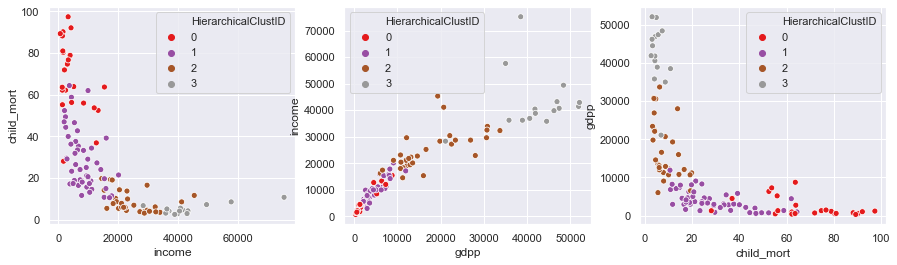

In [88]:
# Scatter plot on Original attributes to visualize the spread of the data
fig, axes = plt.subplots(1,3, figsize=(15,4))
sns.scatterplot(x = 'income', y = 'child_mort',hue='HierarchicalClustID',data = help_merge_col_hc,legend='full',palette="Set1",ax=axes[0])
sns.scatterplot(x = 'gdpp', y = 'income',hue='HierarchicalClustID', data = help_merge_col_hc,legend='full',palette="Set1",ax=axes[1])
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='HierarchicalClustID', data=help_merge_col_hc,legend='full',palette="Set1",ax=axes[2])

1. Cluster 0 countries have higher child mortality and low income , gdpp is also low.
2. Cluster 2,3 have low child mortality and high income,gdpp is also relatively high.
3. Cluster 1 has high child mortality and low income and low gdpp. 

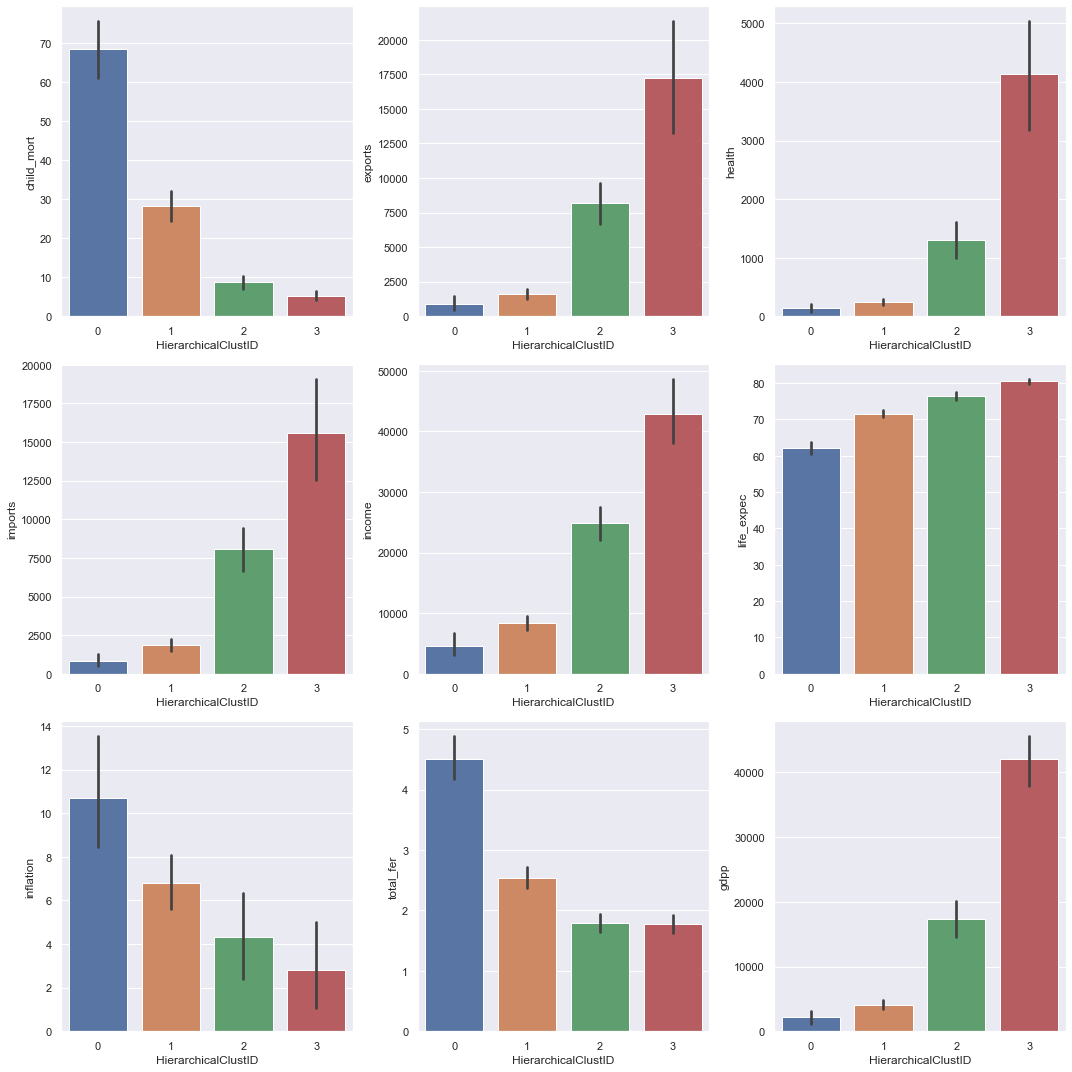

In [89]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

sns.barplot(x=help_merge_col_hc.HierarchicalClustID, y=help_merge_col_hc.child_mort, ax = axs[0,0])
sns.barplot(x=help_merge_col_hc.HierarchicalClustID, y=help_merge_col_hc.exports, ax = axs[0,1])
sns.barplot(x=help_merge_col_hc.HierarchicalClustID, y=help_merge_col_hc.health, ax = axs[0,2])
sns.barplot(x=help_merge_col_hc.HierarchicalClustID, y=help_merge_col_hc.imports, ax = axs[1,0])
sns.barplot(x=help_merge_col_hc.HierarchicalClustID, y=help_merge_col_hc.income, ax = axs[1,1])
sns.barplot(x=help_merge_col_hc.HierarchicalClustID, y=help_merge_col_hc.life_expec, ax = axs[1,2])
sns.barplot(x=help_merge_col_hc.HierarchicalClustID, y=help_merge_col_hc.inflation, ax = axs[2,0])
sns.barplot(x=help_merge_col_hc.HierarchicalClustID, y=help_merge_col_hc.total_fer, ax = axs[2,1])
sns.barplot(x=help_merge_col_hc.HierarchicalClustID, y=help_merge_col_hc.gdpp, ax = axs[2,2])
plt.tight_layout()

1. Cluster 0 has high life expentancy and child mortality.
2. Cluster 1 has high inflation and fertility.
3. Cluster 2 has high GDP per capita,exports and health.
4. Cluster 3 doesn't show much variations in any particular aspect.

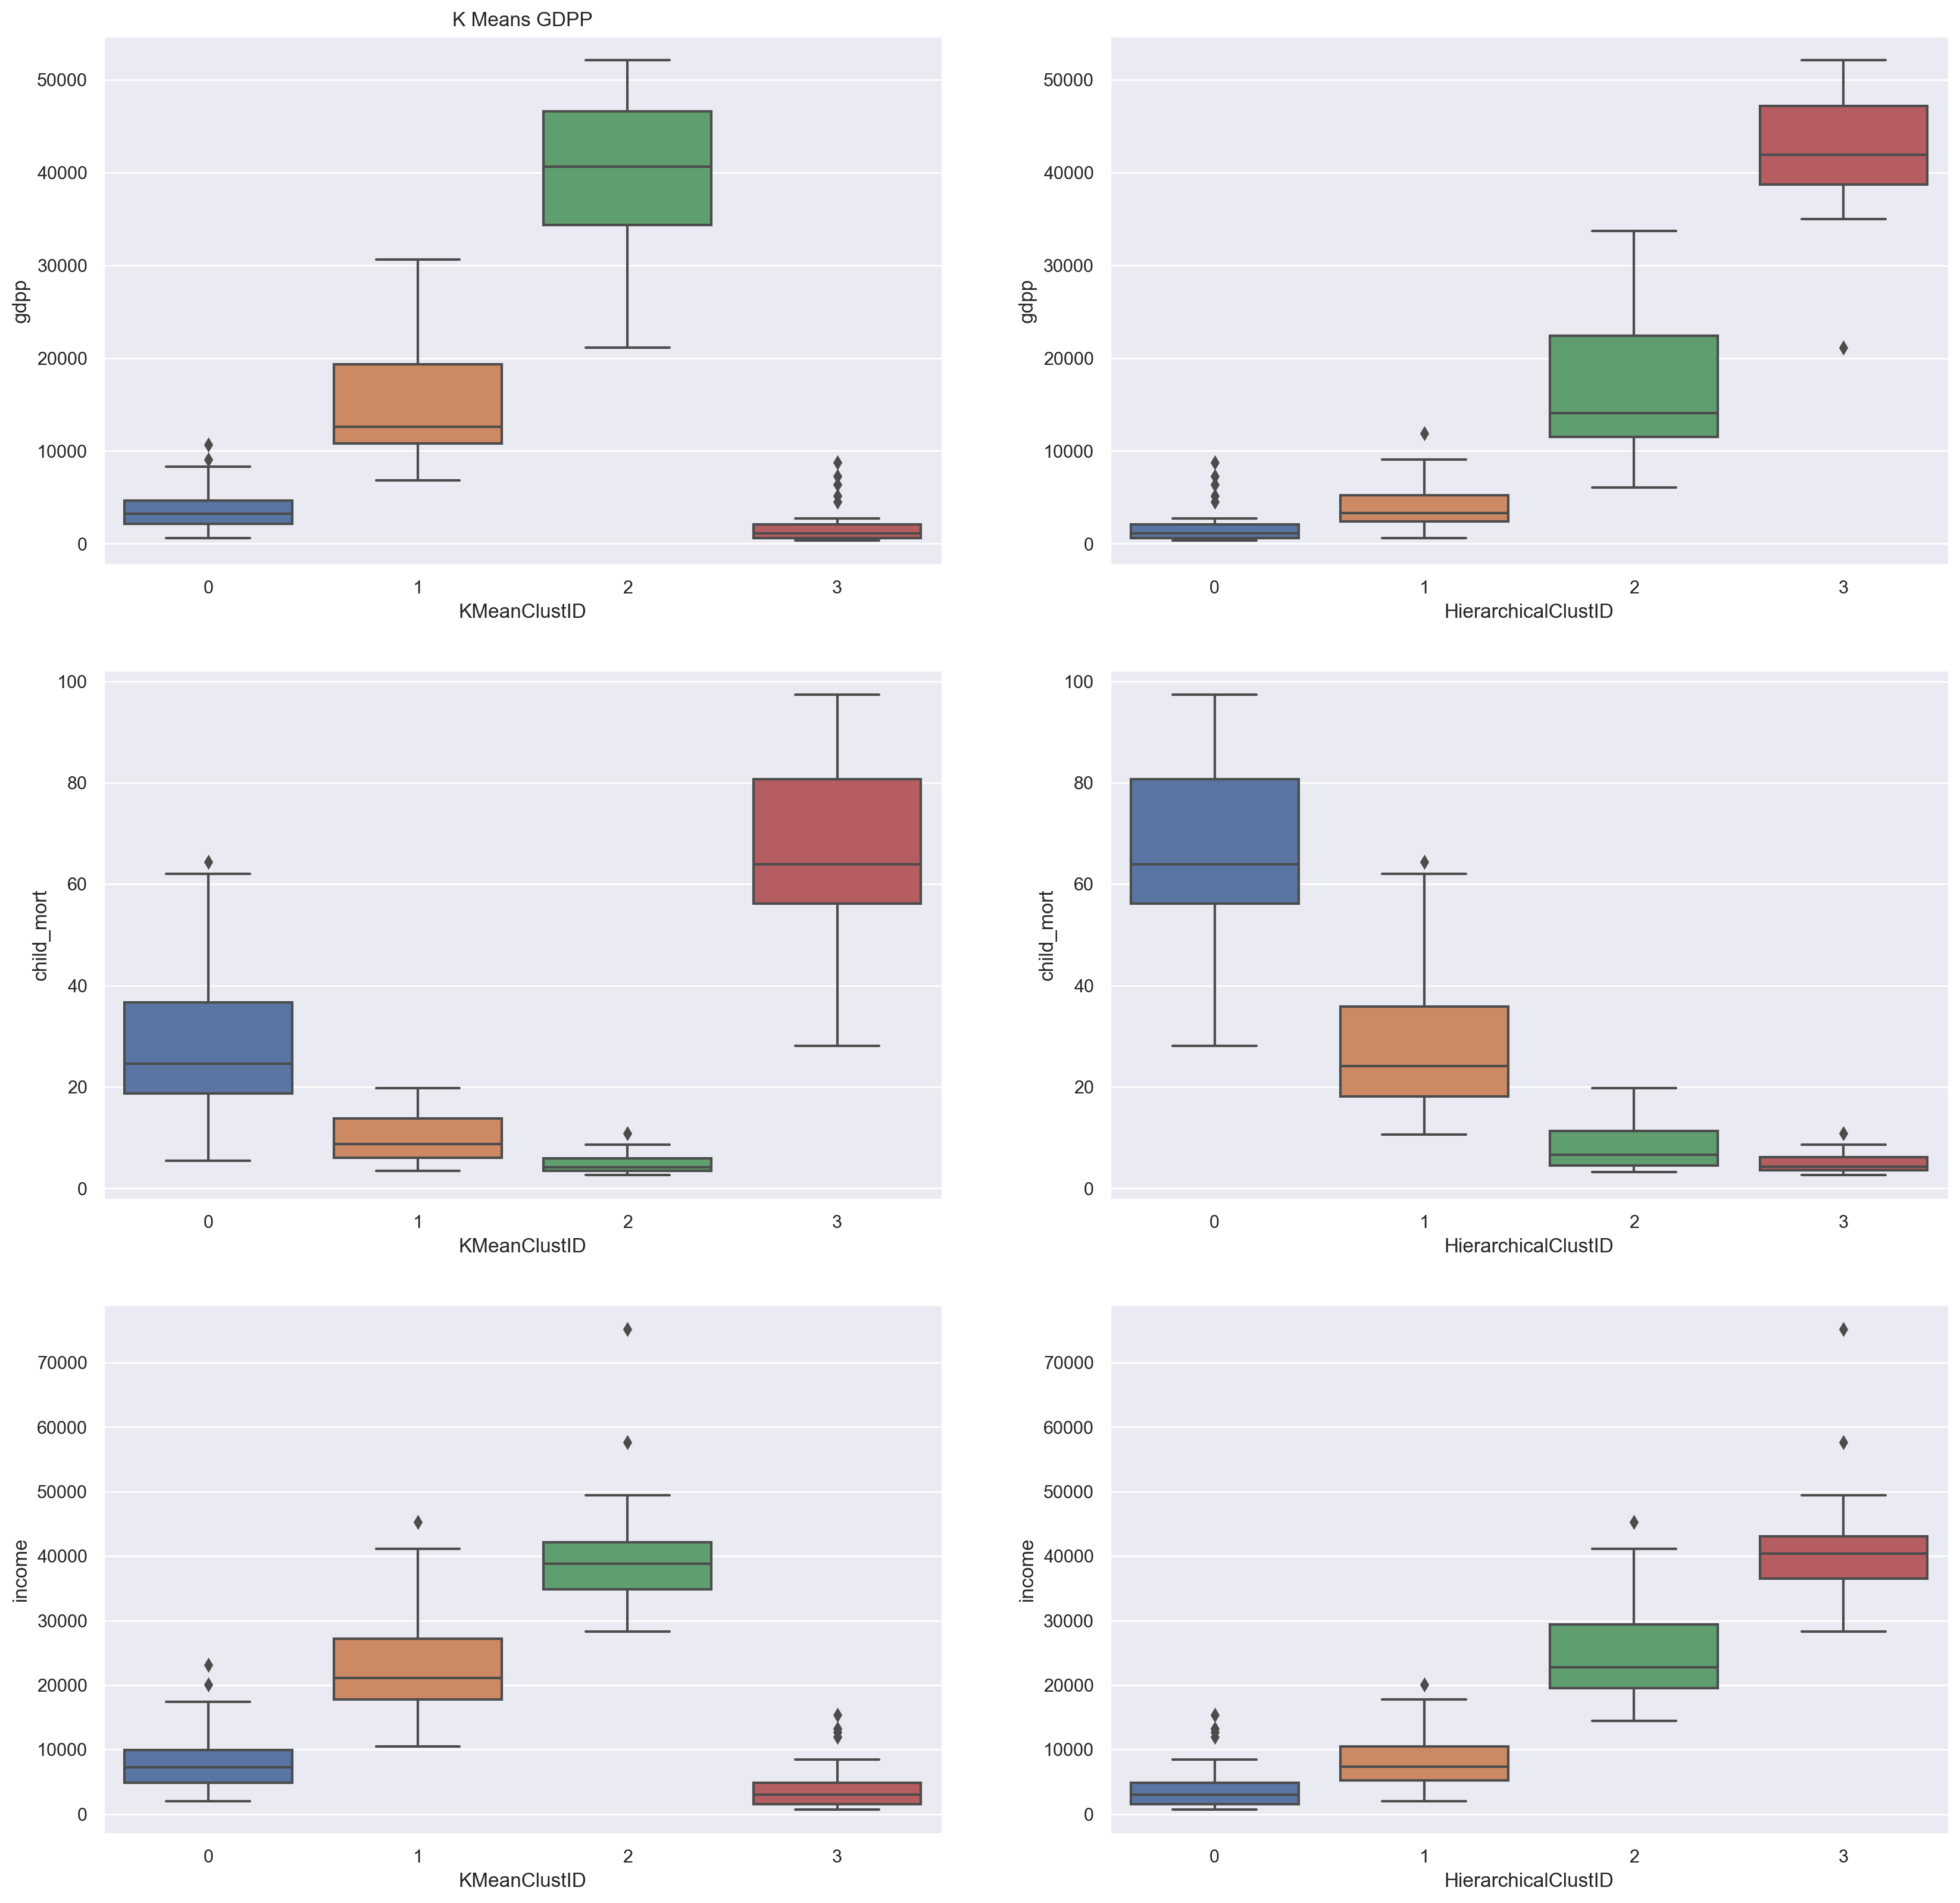

In [90]:
# plotting sub-plots to analyse the results

plt.figure(figsize=(20,20), dpi=200)

plt.subplot(3,2,1)
sns.boxplot(x='KMeanClustID', y='gdpp', data=help_clus_prof)
plt.title("K Means GDPP")

plt.subplot(3,2,2)
sns.boxplot(x='HierarchicalClustID', y='gdpp', data=help_merge_col_hc)

plt.subplot(3,2,3)
sns.boxplot(x='KMeanClustID', y='child_mort', data=help_clus_prof)

plt.subplot(3,2,4)
sns.boxplot(x='HierarchicalClustID', y='child_mort', data=help_merge_col_hc)

plt.subplot(3,2,5)
sns.boxplot(x='KMeanClustID', y='income', data=help_clus_prof)

plt.subplot(3,2,6)
sns.boxplot(x='HierarchicalClustID', y='income', data=help_merge_col_hc)

1. In K-Means Cluster 0 and 3 are the countries that are in need of aid.
2. In Hierarchical Cluster 0 is in dead need of aid compared to other clusters formed.  
3. The clusters formed in both the cases are not that great but its better in K-means as compared to Hierarchial.

In [91]:
pca_help_final = pca_df.copy()
pca_help_final.head()

,PC1,PC2,PC3,country
0,-2.6374,1.4690,-0.5414,Afghanistan
2,-0.4576,-0.6733,0.9619,Algeria
4,0.6498,-1.0244,-0.2501,Antigua and Barbuda
6,-0.3327,-1.2745,0.1766,Armenia
7,3.1804,-0.2508,-0.1169,Australia


In [92]:
pca_help_final['K_Means_Cluster_ID'] = model_clus2.labels_
pca_help_final['Hierarchical_Cluster_Labels'] = cl_cluster_labels

In [93]:
pca_help_final.head()

,PC1,PC2,PC3,country,K_Means_Cluster_ID,Hierarchical_Cluster_Labels
0,-2.6374,1.4690,-0.5414,Afghanistan,3,0
2,-0.4576,-0.6733,0.9619,Algeria,0,1
4,0.6498,-1.0244,-0.2501,Antigua and Barbuda,1,2
6,-0.3327,-1.2745,0.1766,Armenia,0,1
7,3.1804,-0.2508,-0.1169,Australia,2,3


In [94]:
pca_help_final.K_Means_Cluster_ID.value_counts()

0    48
1    29
3    23
2    19
Name: K_Means_Cluster_ID, dtype: int64

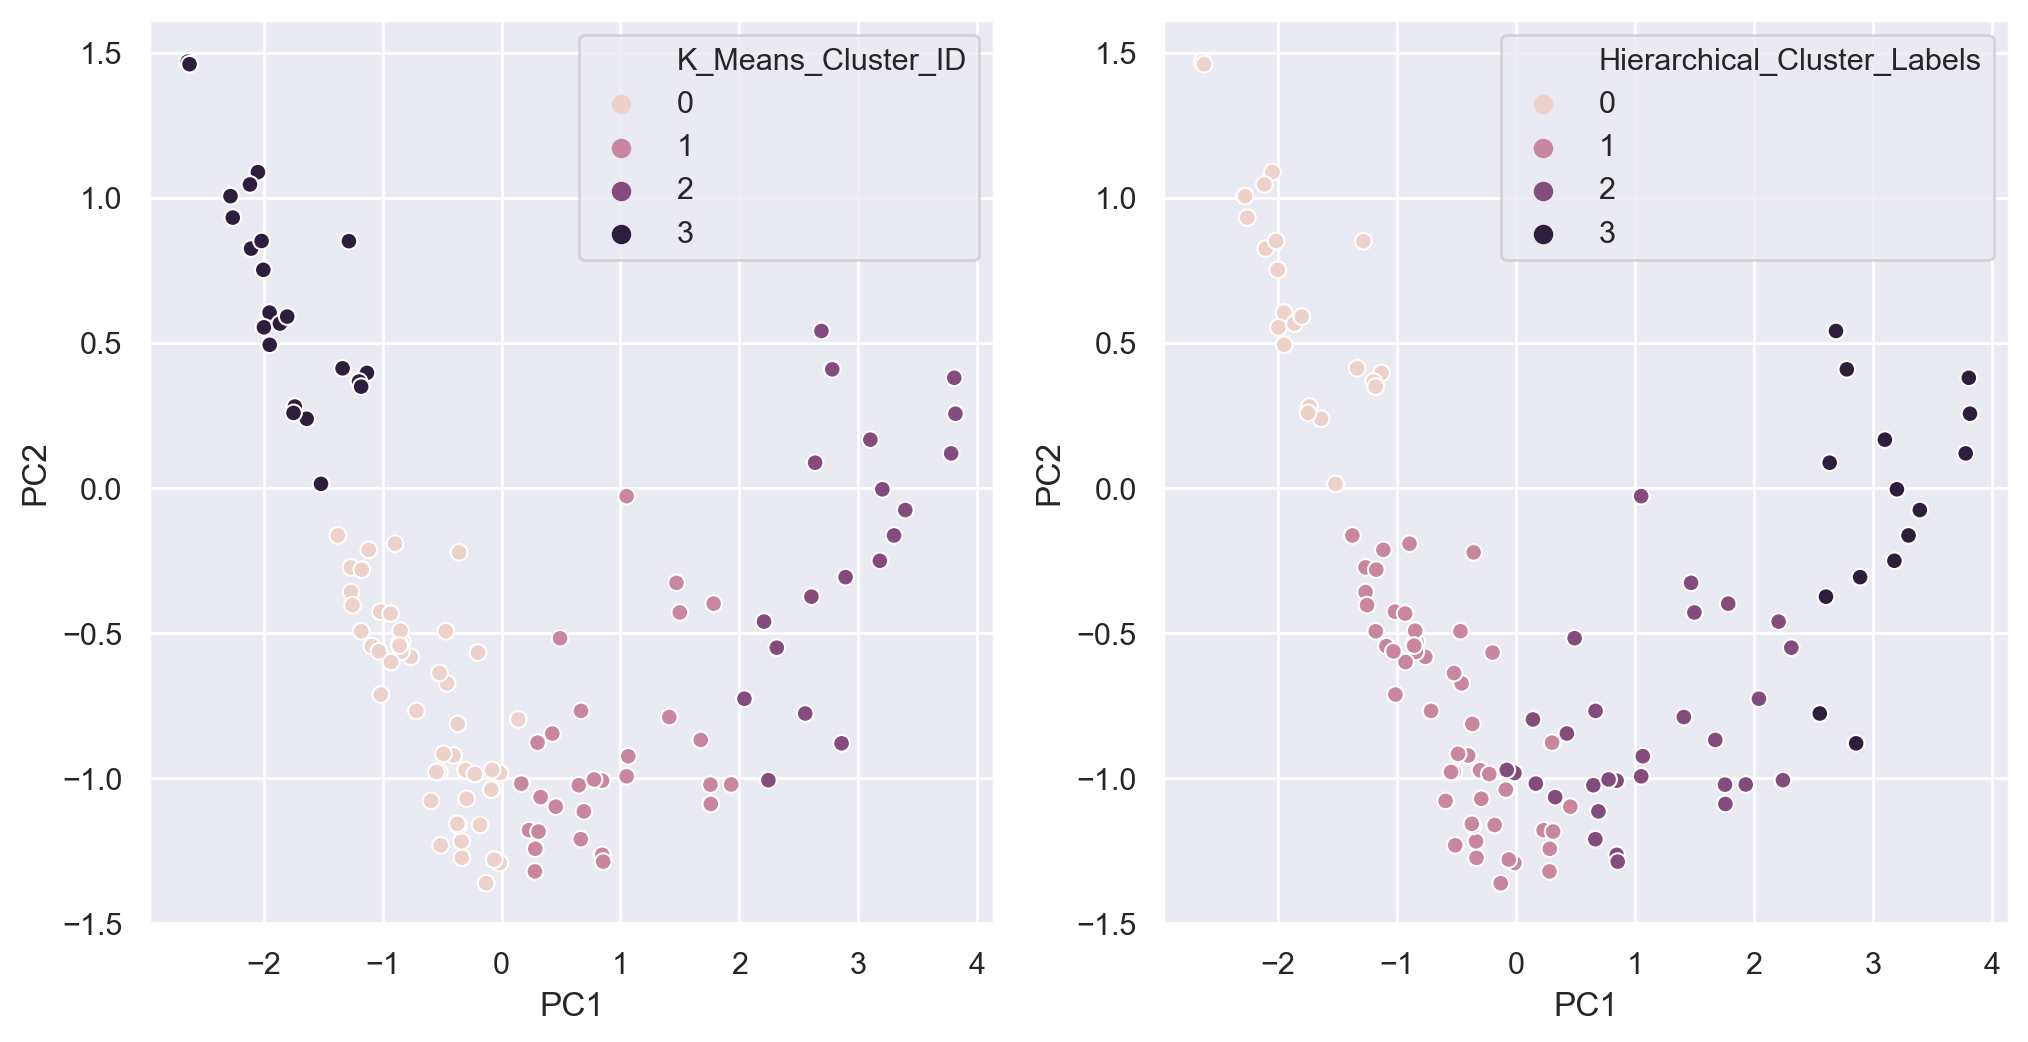

In [95]:
# scatter plot using the first two principal components to observe the cluster distribution

plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='PC1',y='PC2',data=pca_help_final,hue='K_Means_Cluster_ID')

plt.subplot(1,2,2)
sns.scatterplot(x='PC1',y='PC2',data=pca_help_final,hue='Hierarchical_Cluster_Labels')

1. There is not much difference in the clusters that is formed.

In [96]:
help_clus_prof.KMeanClustID.value_counts()

0    48
1    29
3    23
2    19
Name: KMeanClustID, dtype: int64

Text(0.5, 1.0, 'Hierarchical')

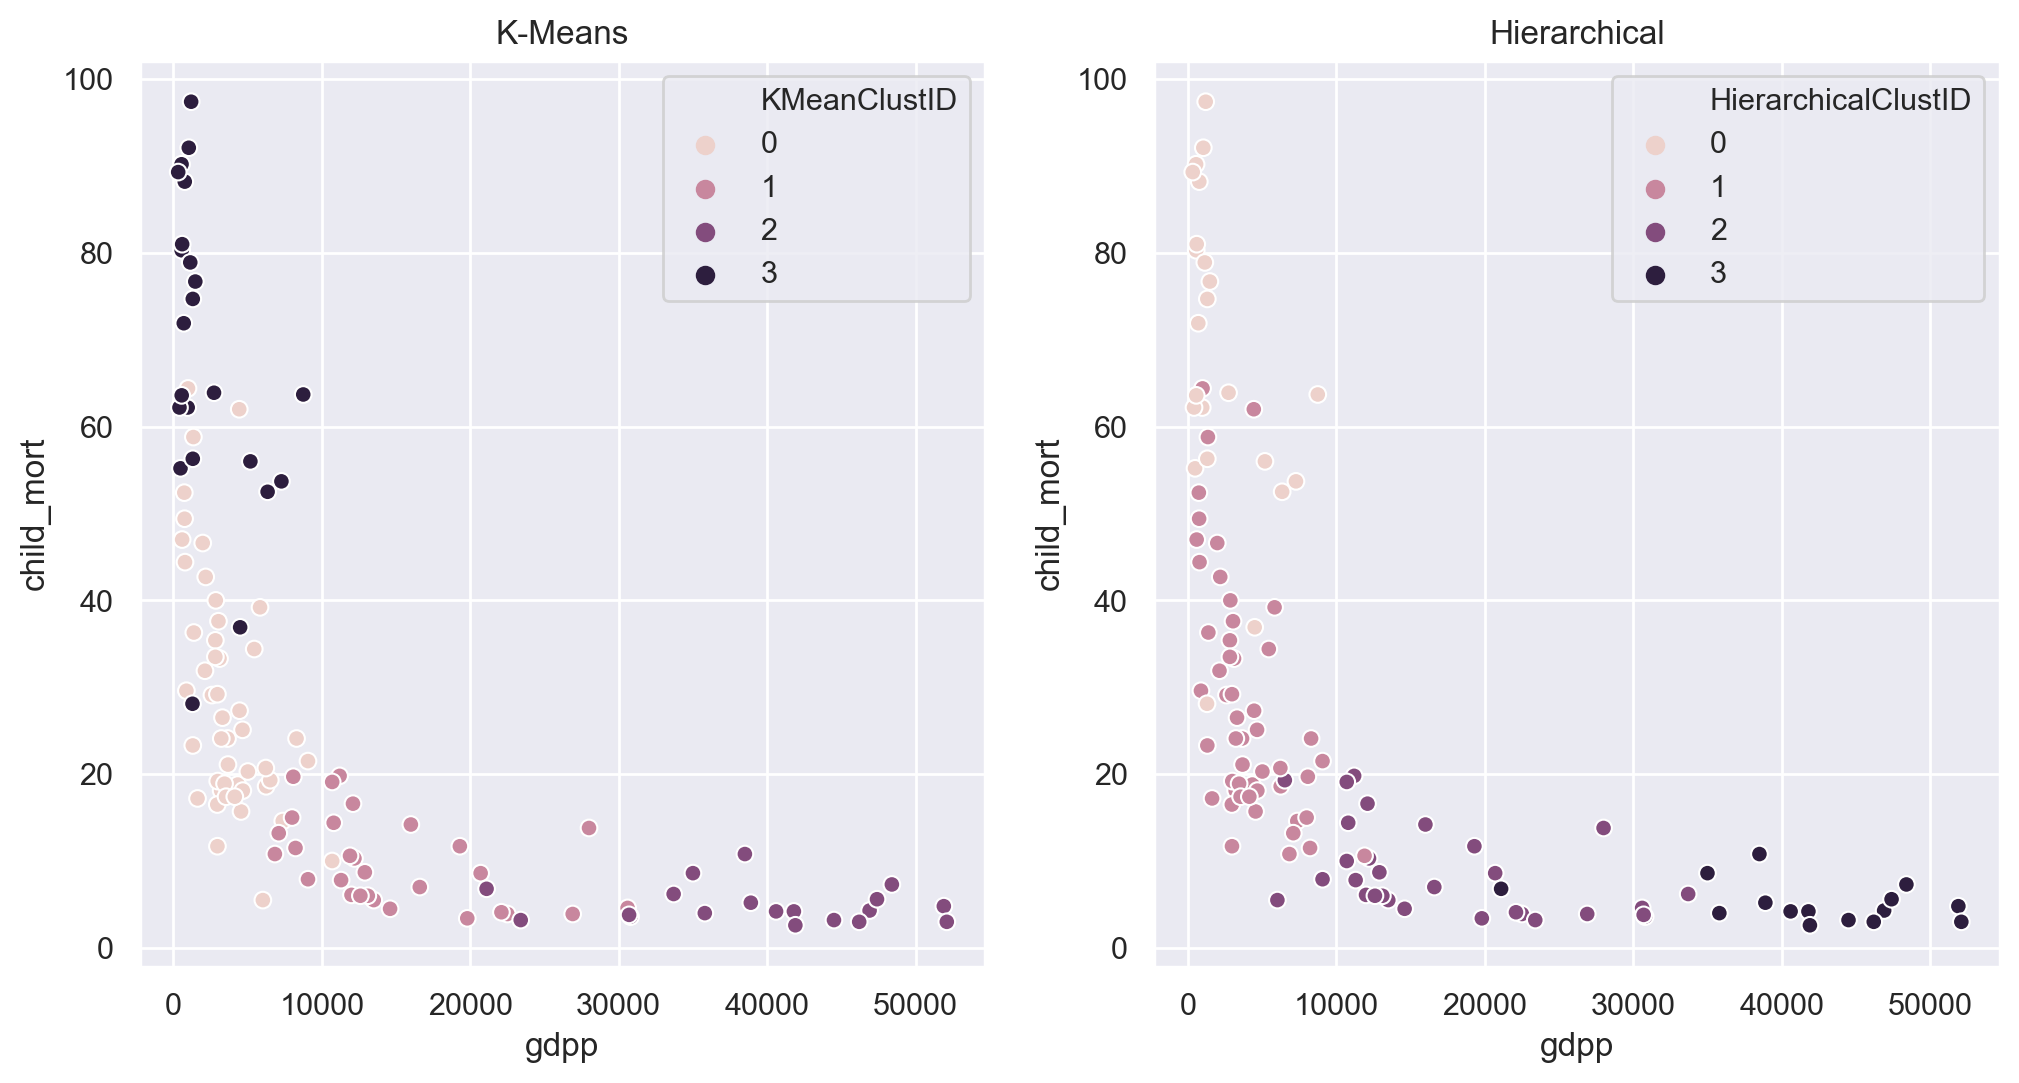

In [97]:
# scatter plot using the gdpp, child_mort to observe the cluster distribution

plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='gdpp',y='child_mort',data=help_clus_prof,hue='KMeanClustID')
plt.title("K-Means")

plt.subplot(1,2,2)
sns.scatterplot(x='gdpp',y='child_mort',data=help_merge_col_hc,hue='HierarchicalClustID')
plt.title("Hierarchical")

Low gdpp corrsponds to low household income and hence higher child mortality rate.

Text(0.5, 1.0, 'Hierarchical')

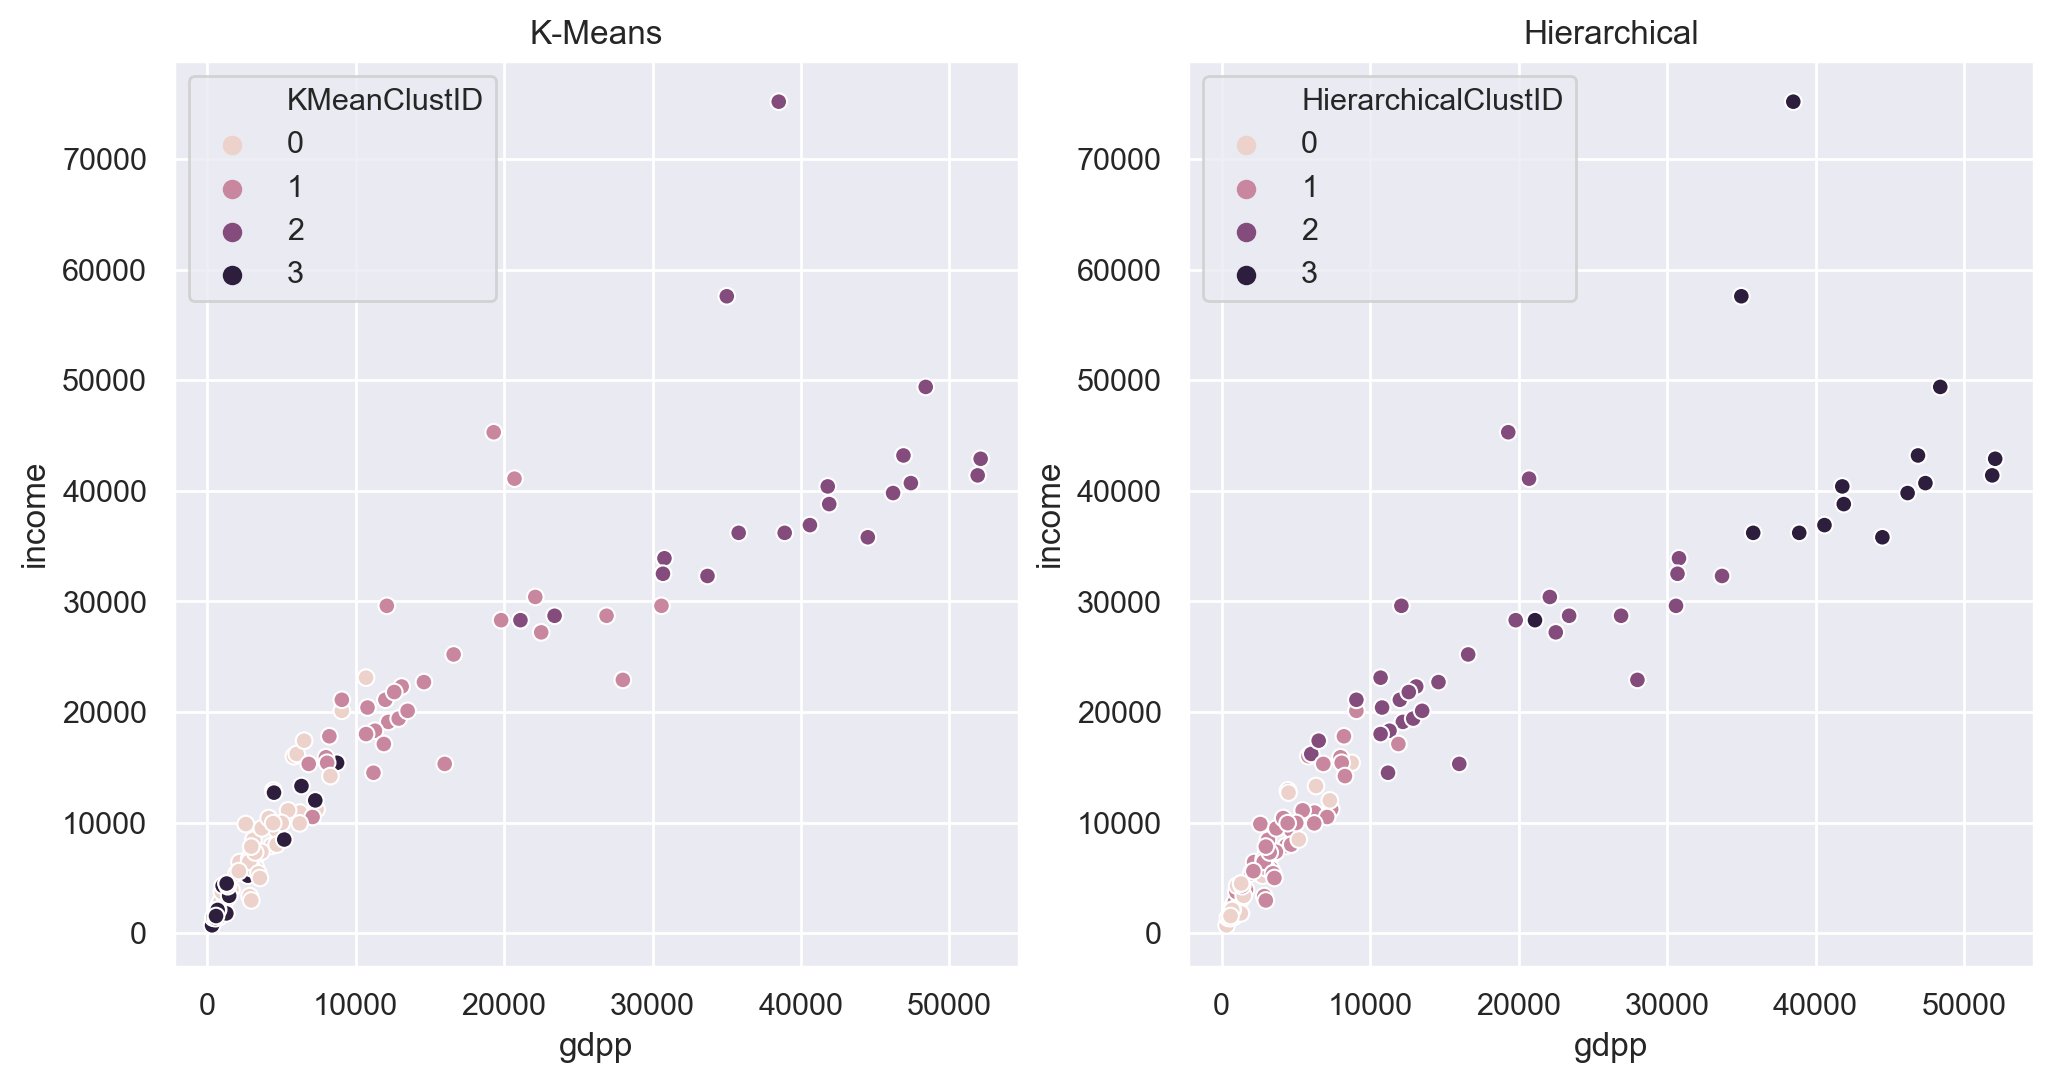

In [98]:
# scatter plot using the gdpp, income to observe the cluster distribution

plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='gdpp',y='income',data=help_clus_prof,hue='KMeanClustID')
plt.title("K-Means")

plt.subplot(1,2,2)
sns.scatterplot(x='gdpp',y='income',data=help_merge_col_hc,hue='HierarchicalClustID')
plt.title("Hierarchical")

We can observe a linear relationship between gdpp and income

Text(0.5, 1.0, 'Hierarchical')

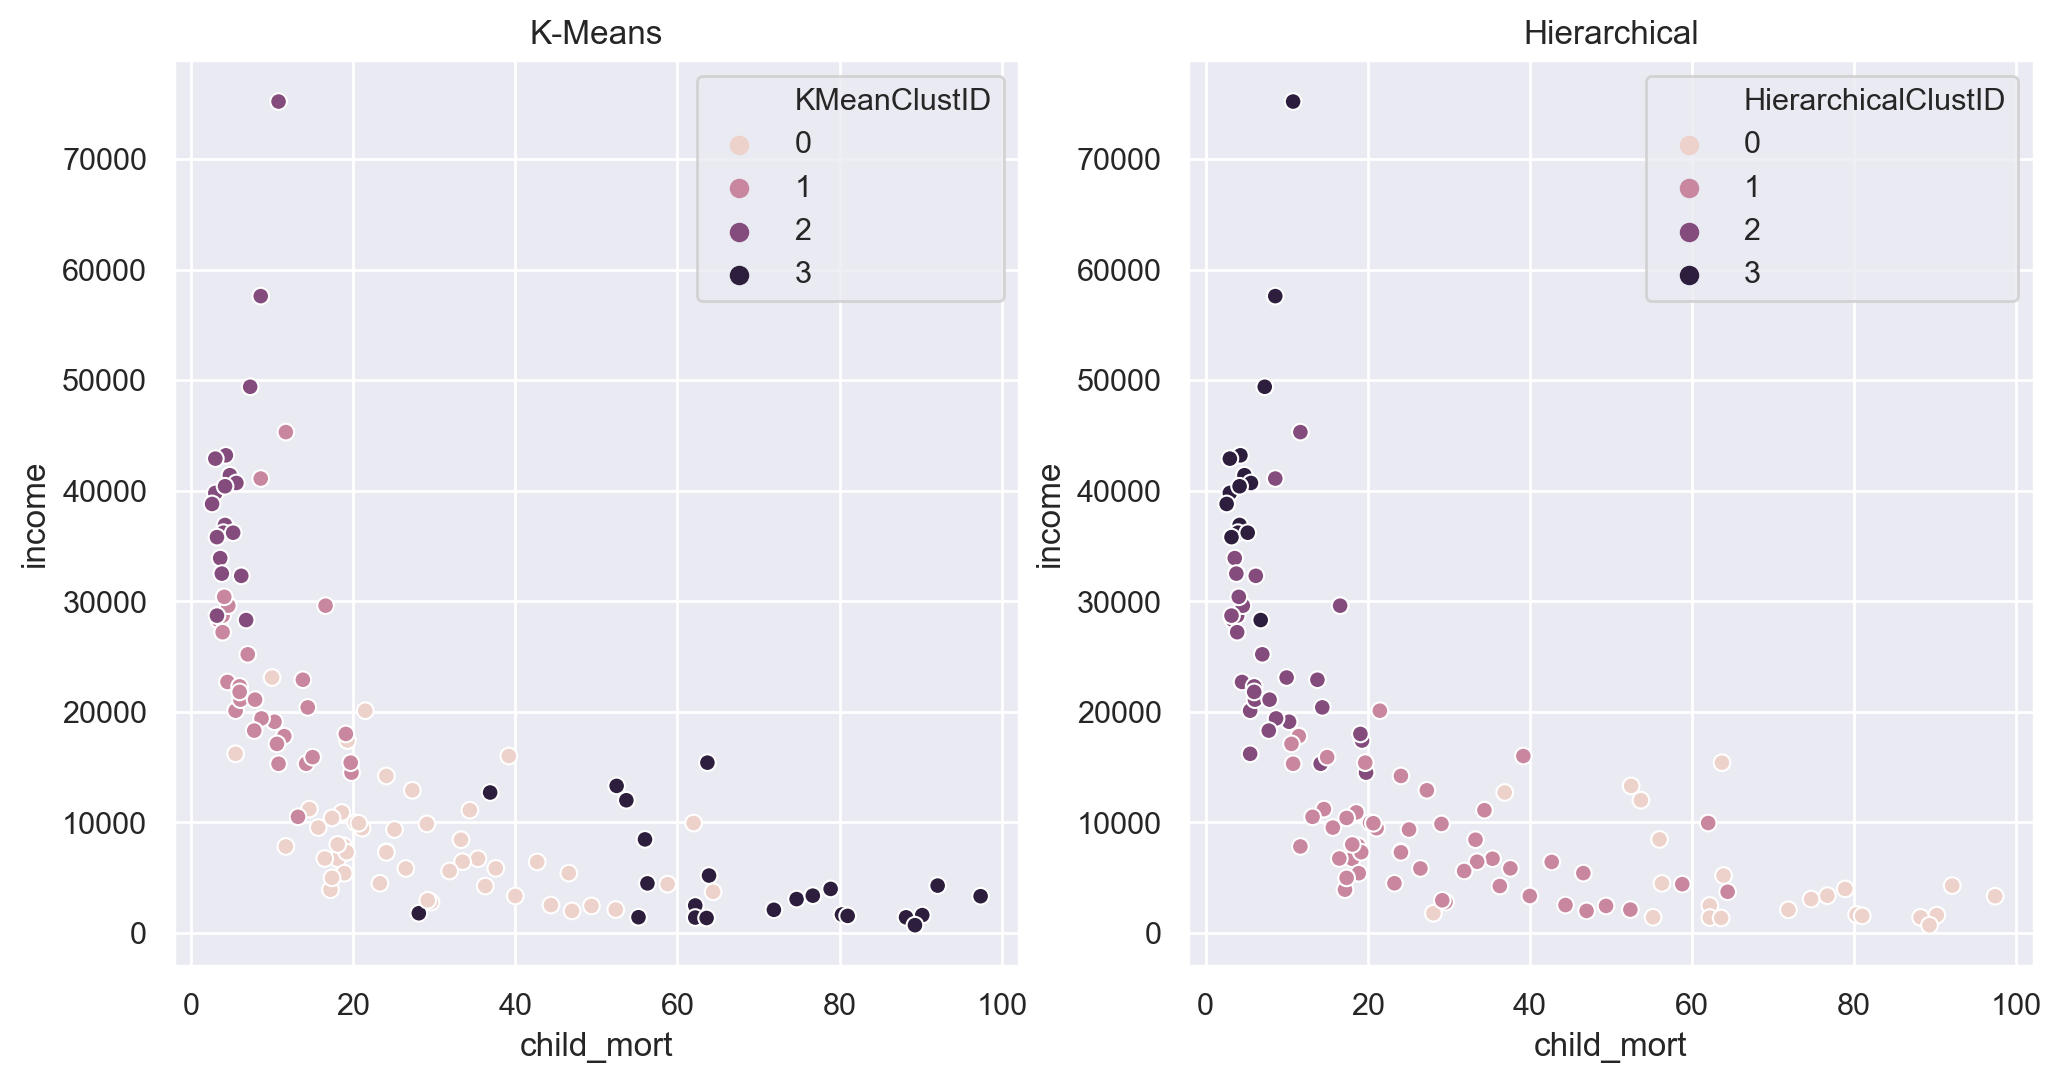

In [99]:
# scatter plot using the child_mort, income to observe the cluster distribution

plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='child_mort',y='income',data=help_clus_prof,hue='KMeanClustID')
plt.title("K-Means")

plt.subplot(1,2,2)
sns.scatterplot(x='child_mort',y='income',data=help_merge_col_hc,hue='HierarchicalClustID')
plt.title("Hierarchical")

As we can observe from the above figure low income results in higher child mortality.

We have analyzed both K-means and Hierarchial clustering and found clusters formed are not identical. The clusters formed in both the cases are not that great but its better in K-means as compared to Hierarchial. So, we will proceed with the clusters formed by K-means and based on the information provided by the final clusters we will deduce the final list of countries which are in need of aid.

## Step 8: Final Analysis

##### Let's analyse Each cluster and determine which country needs aid.

In [100]:
# Checking if the shape of both KMeans and Hierarchical Clustering.
print(help_clus_prof.shape)
print(help_merge_col_hc.shape)

(119, 11)
(119, 11)


In [101]:
# Print the total number of countries in each clusters for both K-Means and Hierarchical Clustering
print(help_clus_prof.KMeanClustID.value_counts())
print(help_merge_col_hc.HierarchicalClustID.value_counts())

0    48
1    29
3    23
2    19
Name: KMeanClustID, dtype: int64
1    51
2    30
0    23
3    15
Name: HierarchicalClustID, dtype: int64


#### From K-Means Clustering

In [102]:
help_clus_0 = help_clus_prof[help_clus_prof['KMeanClustID']== 0]
help_clus_0.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeanClustID
1,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460,0
3,Armenia,18.1000,669.7600,141.6800,1458.6600,6700,7.7700,73.3000,1.6900,3220,0
6,Azerbaijan,39.2000,3171.1200,343.3920,1208.8800,16000,13.8000,69.1000,1.9200,5840,0
9,Bangladesh,49.4000,121.2800,26.6816,165.2440,2440,7.1400,70.4000,2.3300,758,0
11,Belarus,5.5000,3099.4200,338.2830,3889.3500,16200,15.1000,70.4000,1.4900,6030,0


In [103]:
help_clus_0.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeanClustID
count,48.0000,48.0000,48.0000,48.0000,48.0000,48.0000,48.0000,48.0000,48.0000,48.0000
mean,29.0063,1348.8383,212.9333,1569.6786,8136.8750,7.8436,71.0708,2.5540,3708.7917,0.0000
std,13.8518,1019.8584,138.4357,928.5463,4705.0114,4.9638,3.4777,0.6701,2255.4072,0.0000
min,5.5000,1.0769,19.4636,0.6511,1990.0000,0.4800,63.0000,1.2700,592.0000,0.0000
25%,18.7500,671.5150,107.2080,965.3625,4857.5000,3.8500,68.9500,2.1225,2167.5000,0.0000
50%,24.6000,1059.1850,190.1555,1484.2500,7295.0000,7.0900,70.9000,2.5900,3225.0000,0.0000
75%,36.6250,1722.9950,296.6440,2265.6300,9945.0000,11.3500,73.6500,2.8825,4665.0000,0.0000
max,64.4000,4357.5000,581.8300,3889.3500,23100.0000,19.5000,77.9000,4.3400,10700.0000,0.0000


In [104]:
help_clus_3 = help_clus_prof[help_clus_prof['KMeanClustID']== 3]
help_clus_3.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeanClustID
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553,3
15,Botswana,52.5000,2768.6000,527.0500,3257.5500,13300,8.9200,57.1000,2.8800,6350,3
24,Comoros,88.2000,126.8850,34.6819,397.5730,1410,3.8700,65.9000,4.7500,769,3
25,"Congo, Rep.",63.9000,2331.7400,67.4040,1498.7800,5190,20.7000,60.4000,4.9500,2740,3
33,Eritrea,55.2000,23.0878,12.8212,112.3060,1420,11.6000,61.7000,4.6100,482,3


In [105]:
help_clus_3.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeanClustID
count,23.0000,23.0000,23.0000,23.0000,23.0000,23.0000,23.0000,23.0000,23.0000,23.0000
mean,68.4783,884.7745,135.8739,838.6342,4650.8696,10.7113,62.1696,4.5074,2152.7391,3.0000
std,17.7610,1273.6924,177.6583,927.2505,4451.6166,6.2903,3.8838,0.8893,2457.9939,0.0000
min,28.1000,23.0878,12.8212,112.3060,700.0000,2.0900,54.3000,2.5900,327.0000,3.0000
25%,56.1500,115.0675,40.2517,222.1280,1575.0000,5.9100,59.8500,4.1600,579.0000,3.0000
50%,63.9000,291.5600,53.6095,397.5730,3060.0000,9.2500,62.2000,4.6000,1140.0000,3.0000
75%,80.6500,1204.4850,101.9155,1273.1300,4835.0000,16.6000,65.4000,4.9650,2110.0000,3.0000
max,97.4000,5048.7500,650.8320,3257.5500,15400.0000,23.6000,68.2000,6.1500,8750.0000,3.0000


1. In KMeans Clustering Cluster 3 countries is in need of aid.
2. they have low income,gdpp,fertility.
3. They have high child_mortality,imports,inflation.

#### From Hierarchical Clustering

In [106]:
help_hier_clus_0 = help_merge_col_hc[help_merge_col_hc['HierarchicalClustID']==0]
help_hier_clus_0.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,HierarchicalClustID
0,Afghanistan,90.2000,55.3000,248.2970,41.9174,1610,9.4400,56.2000,5.8200,553,0
15,Botswana,52.5000,2768.6000,3257.5500,527.0500,13300,8.9200,57.1000,2.8800,6350,0
24,Comoros,88.2000,126.8850,397.5730,34.6819,1410,3.8700,65.9000,4.7500,769,0
25,"Congo, Rep.",63.9000,2331.7400,1498.7800,67.4040,5190,20.7000,60.4000,4.9500,2740,0
33,Eritrea,55.2000,23.0878,112.3060,12.8212,1420,11.6000,61.7000,4.6100,482,0


1. Cluster 0 is in need of aid.
2. they have low income.
3. They have high child_mortality,imports.

In [107]:
help_clus_3.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeanClustID
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553,3
15,Botswana,52.5000,2768.6000,527.0500,3257.5500,13300,8.9200,57.1000,2.8800,6350,3
24,Comoros,88.2000,126.8850,34.6819,397.5730,1410,3.8700,65.9000,4.7500,769,3
25,"Congo, Rep.",63.9000,2331.7400,67.4040,1498.7800,5190,20.7000,60.4000,4.9500,2740,3
33,Eritrea,55.2000,23.0878,12.8212,112.3060,1420,11.6000,61.7000,4.6100,482,3


In [108]:
help_hier_clus_0.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,HierarchicalClustID
0,Afghanistan,90.2000,55.3000,248.2970,41.9174,1610,9.4400,56.2000,5.8200,553,0
15,Botswana,52.5000,2768.6000,3257.5500,527.0500,13300,8.9200,57.1000,2.8800,6350,0
24,Comoros,88.2000,126.8850,397.5730,34.6819,1410,3.8700,65.9000,4.7500,769,0
25,"Congo, Rep.",63.9000,2331.7400,1498.7800,67.4040,5190,20.7000,60.4000,4.9500,2740,0
33,Eritrea,55.2000,23.0878,112.3060,12.8212,1420,11.6000,61.7000,4.6100,482,0


In [109]:
# List of countries which need help
# Let's merge to see the common countries in both clusters
help_countries= pd.merge(help_hier_clus_0,help_clus_3 ,how = 'inner' , on = ['country', 'child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp'])

### List of countries based on Clustering

In [110]:
pd.set_option('display.max_rows', 80)
help_countries

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,HierarchicalClustID,KMeanClustID
0,Afghanistan,90.2000,55.3000,248.2970,41.9174,1610,9.4400,56.2000,5.8200,553,0,3
1,Botswana,52.5000,2768.6000,3257.5500,527.0500,13300,8.9200,57.1000,2.8800,6350,0,3
2,Comoros,88.2000,126.8850,397.5730,34.6819,1410,3.8700,65.9000,4.7500,769,0,3
3,"Congo, Rep.",63.9000,2331.7400,1498.7800,67.4040,5190,20.7000,60.4000,4.9500,2740,0,3
4,Eritrea,55.2000,23.0878,112.3060,12.8212,1420,11.6000,61.7000,4.6100,482,0,3
5,Gabon,63.7000,5048.7500,1653.7500,306.2500,15400,16.6000,62.9000,4.0800,8750,0,3
6,Gambia,80.3000,133.7560,239.9740,31.9778,1660,4.3000,65.5000,5.7100,562,0,3
7,Ghana,74.7000,386.4500,601.2900,68.3820,3060,16.6000,62.2000,4.2700,1310,0,3
8,Iraq,36.9000,1773.0000,1534.5000,378.4500,12700,16.6000,67.2000,4.5600,4500,0,3
9,Kenya,62.2000,200.1690,324.9120,45.9325,2480,2.0900,62.8000,4.3700,967,0,3


1. As per both K-Means and Hierarchical Clustering common  list of countries that are need of aid are as  shown in pic.
2. These countries have higher child mortality , low income  and low GDP per capita.

In [111]:
help_countries.describe()

,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,HierarchicalClustID,KMeanClustID
count,23.0000,23.0000,23.0000,23.0000,23.0000,23.0000,23.0000,23.0000,23.0000,23.0000,23.0000
mean,68.4783,884.7745,838.6342,135.8739,4650.8696,10.7113,62.1696,4.5074,2152.7391,0.0000,3.0000
std,17.7610,1273.6924,927.2505,177.6583,4451.6166,6.2903,3.8838,0.8893,2457.9939,0.0000,0.0000
min,28.1000,23.0878,112.3060,12.8212,700.0000,2.0900,54.3000,2.5900,327.0000,0.0000,3.0000
25%,56.1500,115.0675,222.1280,40.2517,1575.0000,5.9100,59.8500,4.1600,579.0000,0.0000,3.0000
50%,63.9000,291.5600,397.5730,53.6095,3060.0000,9.2500,62.2000,4.6000,1140.0000,0.0000,3.0000
75%,80.6500,1204.4850,1273.1300,101.9155,4835.0000,16.6000,65.4000,4.9650,2110.0000,0.0000,3.0000
max,97.4000,5048.7500,3257.5500,650.8320,15400.0000,23.6000,68.2000,6.1500,8750.0000,0.0000,3.0000


In [112]:
# Based on final clusters information we are going to deduce the final list.
# We observed that mean child mortality is 69 for the selected clusters and hence 
# let's take all the countries with more than this child mortality .

df_final_list = help[help['child_mort']>69]
df_final_list.shape

(33, 10)

In [113]:
# Let's check the demographic of the resultant data again
df_final_list.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,33.0000,33.0000,33.0000,33.0000,33.0000,33.0000,33.0000,33.0000,33.0000
mean,107.6030,720.0198,71.6574,658.5337,3071.6061,12.5344,57.8212,5.2979,1385.3636
std,28.9019,2534.1275,127.7380,1715.8850,5652.2013,17.7404,6.7373,0.9640,2895.0472
min,71.9000,20.6052,17.7508,90.5520,609.0000,0.8850,32.1000,3.1500,231.0000
25%,89.3000,101.7450,31.9464,192.5440,1210.0000,4.3000,56.2000,4.9800,488.0000
50%,101.0000,140.4000,41.9174,279.6240,1660.0000,9.2000,58.0000,5.3100,702.0000
75%,116.0000,386.4500,64.6600,428.3140,3060.0000,16.1000,60.9000,5.8400,1200.0000
max,208.0000,14671.8000,766.0800,10071.9000,33700.0000,104.0000,68.2000,7.4900,17100.0000


In [114]:
# We observed that mean income is 4651 for the selected clusters and hence 
# let's take all the countries with less than this income .
df_final_list1 = df_final_list[(df_final_list['income']<=4651) & (df_final_list['gdpp']<=2153)]
df_final_list1.shape

(30, 10)

In [115]:
# Let's check the demographic of the resultant data again
df_final_list1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,30.0000,30.0000,30.0000,30.0000,30.0000,30.0000,30.0000,30.0000,30.0000
mean,106.3633,210.0057,45.9960,324.6641,1887.1000,8.7445,57.5533,5.2540,758.5667
std,29.9661,169.8965,24.3313,224.7073,1013.8089,5.9424,7.0185,0.9937,370.1683
min,71.9000,20.6052,17.7508,90.5520,609.0000,0.8850,32.1000,3.1500,231.0000
25%,88.4750,101.4008,31.2951,176.2870,1195.0000,4.1875,55.7500,4.9050,466.2500
50%,98.5500,135.5150,39.6946,251.5340,1575.0000,7.2250,57.8000,5.2900,655.0000
75%,115.5000,291.3750,52.7572,395.7285,2590.0000,12.2500,61.5500,5.7925,1115.0000
max,208.0000,617.3200,129.8700,1181.7000,4280.0000,20.8000,68.2000,7.4900,1480.0000


In [116]:
# We observed that mean gdpp is 7280 for the selected clusters and hence 
# let's take all the countries with less than this gdpp .
df_final_list2 = df_final_list1[df_final_list1['gdpp']<=7280]
df_final_list2.shape

(30, 10)

### Final List of countries which are in need of the aid based on socio-economic factors

In [117]:
df_final_list2['country']

0      Afghanistan             
17     Benin                   
25     Burkina Faso            
26     Burundi                 
28     Cameroon                
31     Central African Republic
32     Chad                    
36     Comoros                 
37     Congo, Dem. Rep.        
40     Cote d'Ivoire           
56     Gambia                  
59     Ghana                   
63     Guinea                  
64     Guinea-Bissau           
66     Haiti                   
84     Lao                     
87     Lesotho                 
88     Liberia                 
94     Malawi                  
97     Mali                    
99     Mauritania              
106    Mozambique              
112    Niger                   
116    Pakistan                
132    Sierra Leone            
142    Sudan                   
147    Tanzania                
150    Togo                    
155    Uganda                  
166    Zambia                  
Name: country, dtype: object

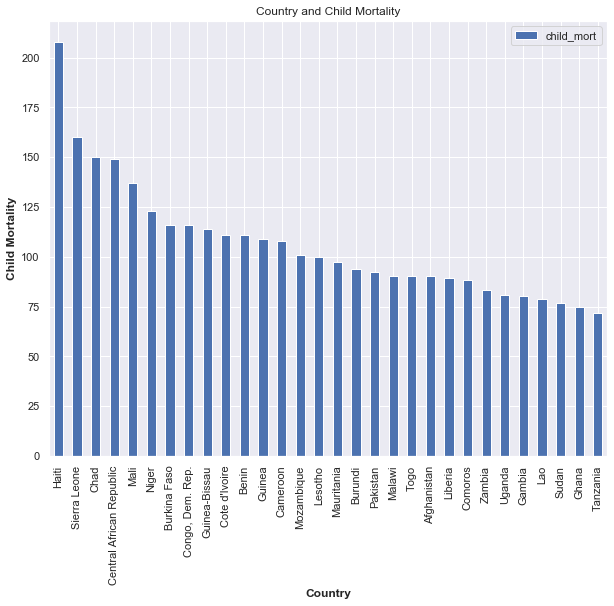

In [118]:
# BarPlot for Child Mortality of countries which are in need of aid
df_list_cm = pd.DataFrame(df_final_list2.groupby(['country'])['child_mort'].mean().sort_values(ascending = False))
df_list_cm.plot.bar()
plt.title('Country and Child Mortality')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Child Mortality", fontsize = 12, fontweight = 'bold')
plt.show()

1. Haiti has highest child mortality around 200+.
2. Second is Sierra Leone , then comes Chad and Central African republic.
3. Least is Solomon Islands.

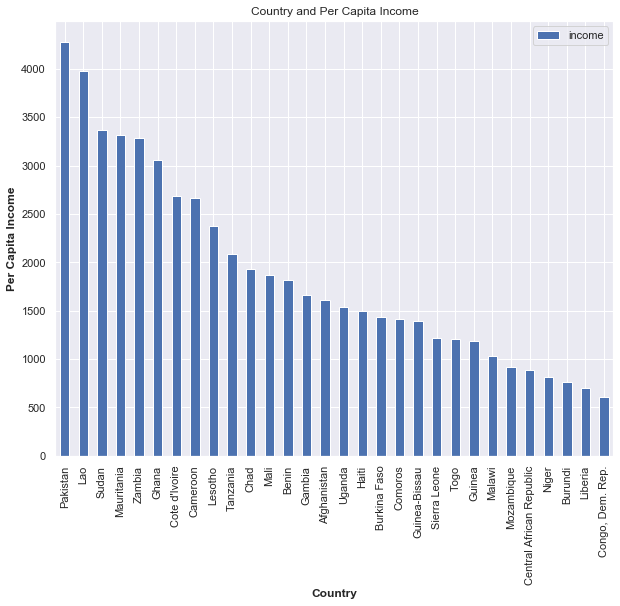

In [119]:
# BarPlot for Per Capita Income of countries which are in need of aid
df_list_in = pd.DataFrame(df_final_list2.groupby(['country'])['income'].mean().sort_values(ascending = False))
df_list_in.plot.bar()
plt.title('Country and Per Capita Income')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Per Capita Income", fontsize = 12, fontweight = 'bold')
plt.show()

1. Pakistan has highest GDP per capita.
2. Lao,Sudan comes later.
3. Congo,Dem.Rep. , Liberia , Burundi , Niger ,  Cental african Republic has lowest GDP.

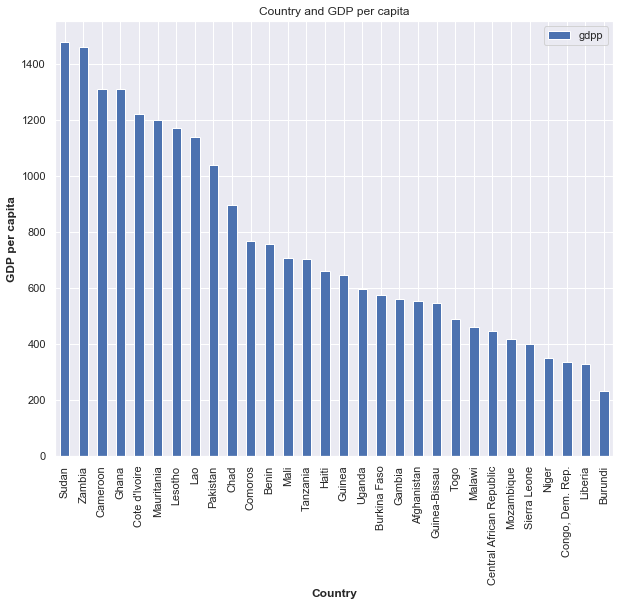

In [120]:
# BarPlot for Per Capita Income of countries which are in need of aid
df_list_gdp = pd.DataFrame(df_final_list2.groupby(['country'])['gdpp'].mean().sort_values(ascending = False))
df_list_gdp.plot.bar()
plt.title('Country and GDP per capita')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("GDP per capita", fontsize = 12, fontweight = 'bold')
plt.show()

1. Sudan  has highest GDP per capita.
2. zambia,Cameroon comes later.
3. Congo,Dem.Rep. , Liberia , Burundi , Niger ,  Cental african Republic. have least GDP.

We have used PCA above to reduce the variables involved and then done the clustering of countries based on those Principal components and then later we identified few factors like child mortality, income etc which plays a vital role in deciding the development status of the country and builded clusters of countries based on that. Based on those clusters we have identified the below list of countries which are in dire need of aid. The list of countries are subject to change as it is based on the few factors like Number of components chosen, Number of Clusters chosen, Clustering method used etc.which we have used to build the model.

In [121]:
# Final countries list
df_final_list2.reset_index(drop=True).country

0     Afghanistan             
1     Benin                   
2     Burkina Faso            
3     Burundi                 
4     Cameroon                
5     Central African Republic
6     Chad                    
7     Comoros                 
8     Congo, Dem. Rep.        
9     Cote d'Ivoire           
10    Gambia                  
11    Ghana                   
12    Guinea                  
13    Guinea-Bissau           
14    Haiti                   
15    Lao                     
16    Lesotho                 
17    Liberia                 
18    Malawi                  
19    Mali                    
20    Mauritania              
21    Mozambique              
22    Niger                   
23    Pakistan                
24    Sierra Leone            
25    Sudan                   
26    Tanzania                
27    Togo                    
28    Uganda                  
29    Zambia                  
Name: country, dtype: object